# KMeans

In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv("../Milestone_2/all_features.csv")

In [3]:
X.head()

Unnamed: 0.1     filename                     label       ASM     contrast  \
0             0  Image_1.jpg          SOUTHERN DOGFACE  0.000520   225.271447   
1             1  Image_2.jpg                    ADONIS  0.000193   896.546635   
2             2  Image_3.jpg            BROWN SIPROETA  0.004830   270.958244   
3             3  Image_4.jpg                   MONARCH  0.000272  1329.045213   
4             4  Image_5.jpg  GREEN CELLED CATTLEHEART  0.005858   825.113118   

   correlation      variance  homogeneity  sum_average  sum_variance  ...  \
0     0.975459   4590.227562     0.255875   234.381672  18135.638803  ...   
1     0.879080   3706.946471     0.141954   238.754102  13931.239250  ...   
2     0.980938   7107.513638     0.390153   296.217951  28159.096306  ...   
3     0.882228   5642.199427     0.213191   298.740987  21239.752496  ...   
4     0.962291  10941.203441     0.328611   267.948943  42939.700647  ...   

       6397        645        706        716        809        851        916  \
0 -0.106018   1.485386  -3.574178  -2.148077  -7.703506  -3.626086  -9.860100   
1  0.056109   3.416929  -2.565523   0.108830   4.978515   4.474832  12.541668   
2 -0.833056  11.383557   3.568245  11.023996  -7.512587  -7.007218 -10.410913   
3  0.002435   8.284797  15.961159   0.285843 -16.601744  11.426028   4.654343   
4  2.735740  -3.427727   0.850464  -8.847474  -7.627993  -6.294594  -4.557978   

         975           label.1      filename.1  
0  -0.052879  SOUTHERN DOGFACE     Image_1.jpg  
1   4.487264       RED POSTMAN    Image_10.jpg  
2  -4.000995       COPPER TAIL   Image_100.jpg  
3 -11.825953     SLEEPY ORANGE  Image_1000.jpg  
4  -0.866165       RED CRACKER  Image_1001.jpg  

[5 rows x 208 columns]

In [4]:
X = X.iloc[:, 2:-2]

In [5]:
X, labels = X.drop("label", axis=1), X["label"]

In [6]:
X = StandardScaler().fit_transform(X)

In [7]:
kmeans = KMeans()

In [8]:
kmeans.fit(X)

KMeans()

In [9]:
kmeans.inertia_

1179066.380162893

In [10]:
silhouette_score(X, kmeans.labels_)

np.float64(0.01862459745099758)

In [11]:
davies_bouldin_score(X, kmeans.labels_)

np.float64(5.223643545451528)

In [12]:
calinski_harabasz_score(X, kmeans.labels_)

np.float64(110.28543656924083)

In [27]:
n_clusters = np.arange(2, 201, 1)

scores = np.zeros([n_clusters.shape[0], 4])

for i in range(scores.shape[0]):
    kmeans = KMeans(n_clusters=n_clusters[i])
    kmeans.fit(X)
    
    scores[i, 0] = kmeans.inertia_
    scores[i, 1] = silhouette_score(X, kmeans.labels_)
    scores[i, 2] = davies_bouldin_score(X, kmeans.labels_)
    scores[i, 3] = calinski_harabasz_score(X, kmeans.labels_)

    if i % 10 == 0:
        print(n_clusters[i], end="-->")

2-->12-->22-->32-->42-->52-->62-->72-->82-->92-->102-->112-->122-->132-->142-->152-->162-->172-->182-->192-->

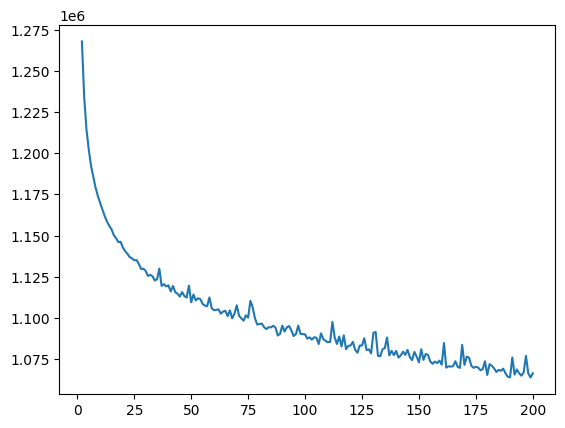

In [28]:
plt.plot(n_clusters, scores[:, 0])
plt.show()

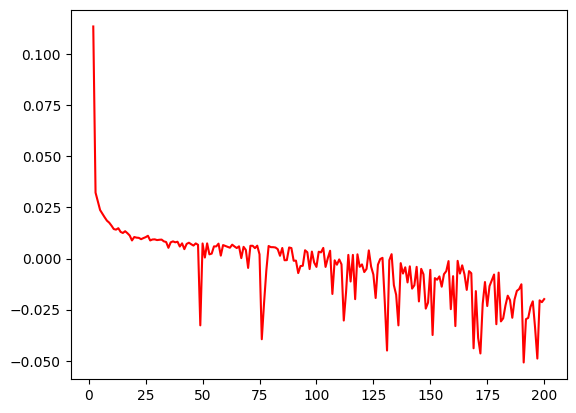

In [29]:
plt.plot(n_clusters, scores[:, 1], color="red")
plt.show()

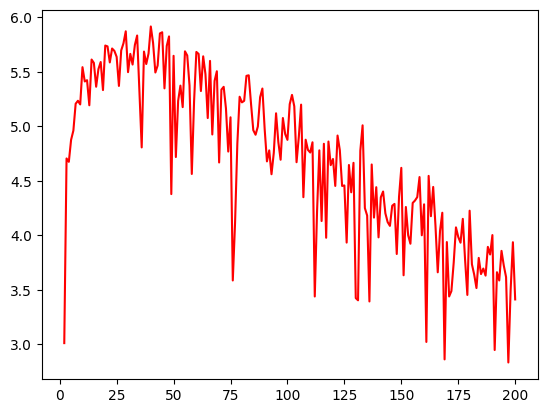

In [30]:
plt.plot(n_clusters, scores[:, 2], color="red")
plt.show()

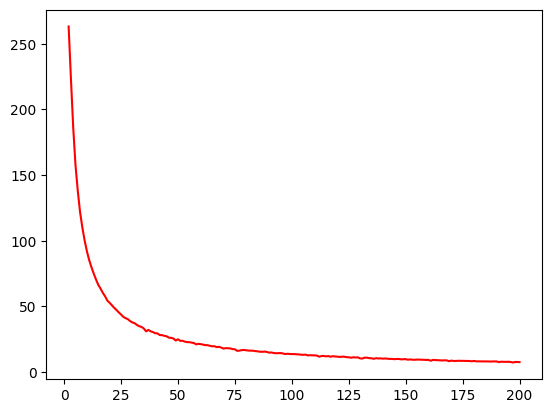

In [31]:
plt.plot(n_clusters, scores[:, 3], color="red")
plt.show()

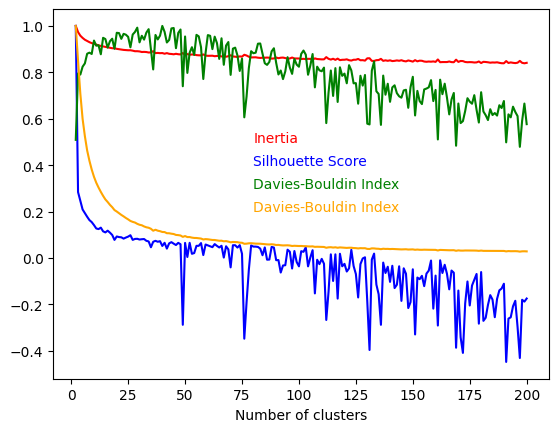

In [35]:
x = 80
y = 0.5
plt.plot(n_clusters, scores[:, 0]/np.max(scores[:, 0]), color="red")
plt.text(x, y - 0 * 0.1, 'Inertia', color='red')

plt.plot(n_clusters, scores[:, 1]/np.max(scores[:, 1]), color="blue")
plt.text(x, y - 1 * 0.1, 'Silhouette Score', color='blue')

plt.plot(n_clusters, scores[:, 2]/np.max(scores[:, 2]), color="green")
plt.text(x, y - 2 * 0.1, 'Davies-Bouldin Index', color='green')

plt.plot(n_clusters, scores[:, 3]/np.max(scores[:, 3]), color="orange")
plt.text(x, y - 3 * 0.1, 'Calinski-Harabasz Index', color='orange')

plt.savefig("K-Means_01.png")
plt.xlabel("Number of clusters")
plt.show()

In [36]:
import pickle as pkl

In [37]:
with open("K-Means_scores_1.pkl", "wb") as file:
    pkl.dump(scores, file)

In [41]:
n_clusters = np.arange(2, 21, 1)

scores = np.zeros([n_clusters.shape[0], 4])

for i in range(scores.shape[0]):
    kmeans = KMeans(n_clusters=n_clusters[i])
    kmeans.fit(X)
    
    scores[i, 0] = kmeans.inertia_
    scores[i, 1] = silhouette_score(X, kmeans.labels_)
    scores[i, 2] = davies_bouldin_score(X, kmeans.labels_)
    scores[i, 3] = calinski_harabasz_score(X, kmeans.labels_)

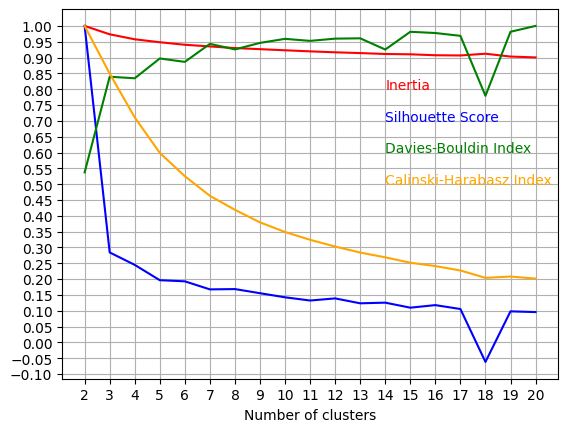

In [51]:
x = 14
y = 0.8
plt.plot(n_clusters, scores[:, 0]/np.max(scores[:, 0]), color="red")
plt.text(x, y - 0 * 0.1, 'Inertia', color='red')

plt.plot(n_clusters, scores[:, 1]/np.max(scores[:, 1]), color="blue")
plt.text(x, y - 1 * 0.1, 'Silhouette Score', color='blue')

plt.plot(n_clusters, scores[:, 2]/np.max(scores[:, 2]), color="green")
plt.text(x, y - 2 * 0.1, 'Davies-Bouldin Index', color='green')

plt.plot(n_clusters, scores[:, 3]/np.max(scores[:, 3]), color="orange")
plt.text(x, y - 3 * 0.1, 'Calinski-Harabasz Index', color='orange')

plt.savefig("K-Means_02.png")
plt.xlabel("Number of clusters")
plt.grid("on")
plt.xticks(range(2, 21))
plt.yticks(np.arange(-0.1, 1.01, 0.05))
plt.show()

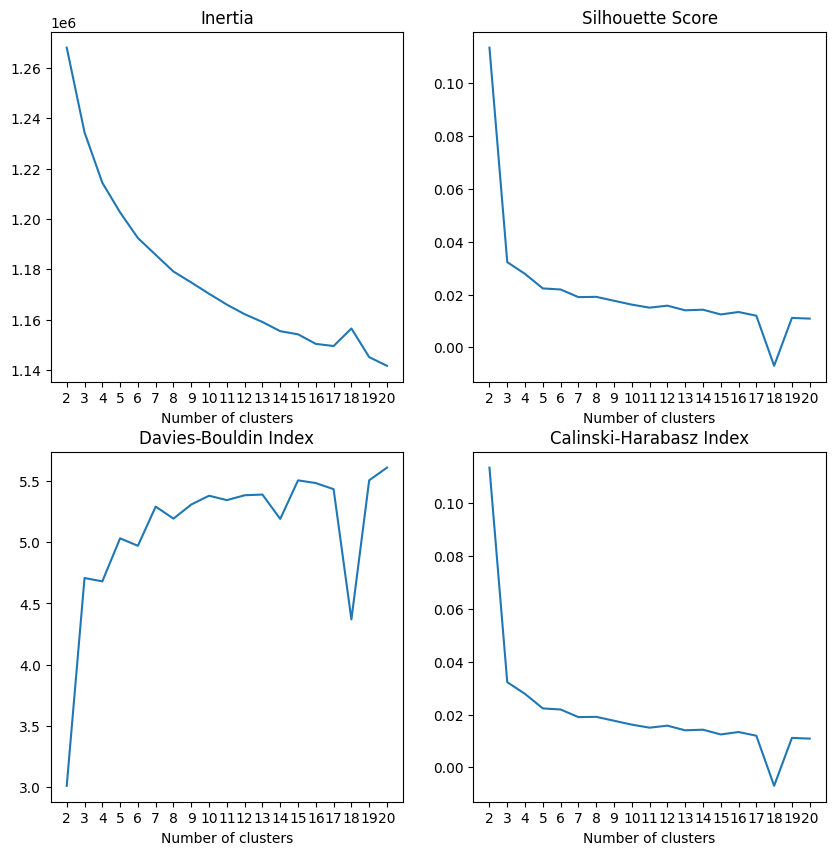

In [52]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(n_clusters, scores[:, 0])
plt.title("Inertia")
plt.xlabel("Number of clusters")
plt.xticks(range(2, 21))

plt.subplot(2, 2, 2)
plt.plot(n_clusters, scores[:, 1])
plt.title("Silhouette Score")
plt.xlabel("Number of clusters")
plt.xticks(range(2, 21))

plt.subplot(2, 2, 3)
plt.plot(n_clusters, scores[:, 2])
plt.title("Davies-Bouldin Index")
plt.xlabel("Number of clusters")
plt.xticks(range(2, 21))

plt.subplot(2, 2, 4)
plt.plot(n_clusters, scores[:, 1])
plt.title("Calinski-Harabasz Index")
plt.xlabel("Number of clusters")
plt.xticks(range(2, 21))

plt.show()

In [53]:
from sklearn.decomposition import PCA

In [54]:
pca = PCA(n_components=0.99)

In [55]:
X_prep = pca.fit_transform(X)

In [56]:
X_prep.shape, X.shape

((6499, 176), (6499, 203))

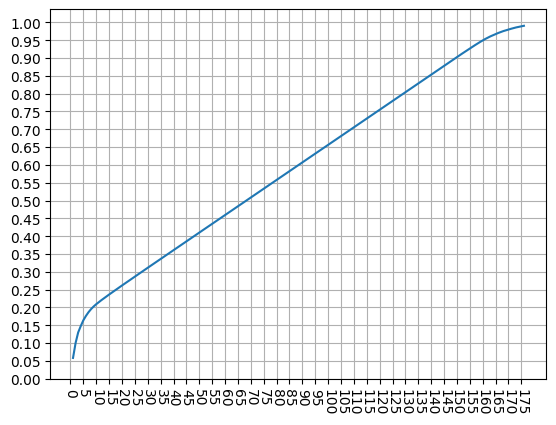

In [57]:
plt.plot(
    np.arange(pca.explained_variance_.shape[0])+1,
    np.cumsum(pca.explained_variance_ratio_)
)
plt.yticks(np.arange(0, 1.01, 0.05))
plt.xticks(np.arange(0, pca.explained_variance_.shape[0]+1, 5), rotation=-90)
plt.grid("on")

In [58]:
X_prep = X_prep[:, :165]

In [62]:
n_clusters = np.arange(2, 201, 1)

scores3 = np.zeros([n_clusters.shape[0], 4])

for i in range(scores3.shape[0]):
    kmeans = KMeans(n_clusters=n_clusters[i])
    kmeans.fit(X_prep)
    
    scores3[i, 0] = kmeans.inertia_
    scores3[i, 1] = silhouette_score(X, kmeans.labels_)
    scores3[i, 2] = davies_bouldin_score(X, kmeans.labels_)
    scores3[i, 3] = calinski_harabasz_score(X, kmeans.labels_)

    if i % 10 == 0:
        print(n_clusters[i], end="-->")

2-->12-->22-->32-->42-->52-->62-->72-->82-->92-->102-->112-->122-->132-->142-->152-->162-->172-->182-->192-->

In [66]:
x = 160
y = 0.5
plt.plot(n_clusters, scores3[:, 0]/np.max(scores3[:, 0]), color="red")
plt.text(x, y - 0 * 0.1, 'Inertia', color='red')

plt.plot(n_clusters, scores3[:, 1]/np.max(scores3[:, 1]), color="blue")
plt.text(x, y - 1 * 0.1, 'Silhouette Score', color='blue')

plt.plot(n_clusters, scores3[:, 2]/np.max(scores3[:, 2]), color="green")
plt.text(x, y - 2 * 0.1, 'Davies-Bouldin Index', color='green')

plt.plot(n_clusters, scores3[:, 3]/np.max(scores3[:, 3]), color="orange")
plt.text(x, y - 3 * 0.1, 'Calinski-Harabasz Index', color='orange')

plt.savefig("K-Means_03.png")
plt.xlabel("Number of clusters")
plt.grid("on")
plt.yticks(np.arange(-0.6, 1.01, 0.1))
plt.show()

In [68]:
with open("K-Means_scores_1.pkl", "rb") as file:
    scores = pkl.load(file)

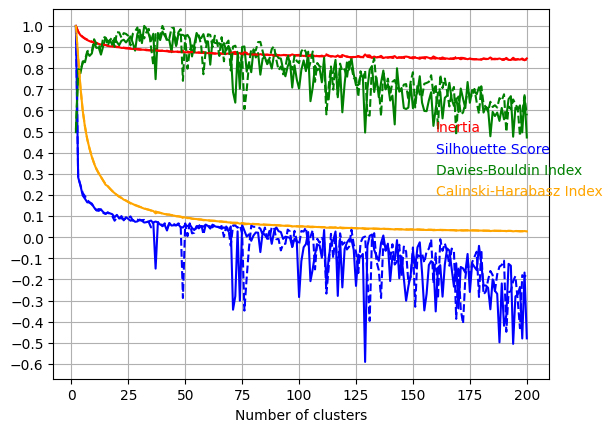

In [69]:
x = 160
y = 0.5
plt.plot(n_clusters, scores3[:, 0]/np.max(scores3[:, 0]), color="red", )
plt.text(x, y - 0 * 0.1, 'Inertia', color='red')

plt.plot(n_clusters, scores3[:, 1]/np.max(scores3[:, 1]), color="blue")
plt.text(x, y - 1 * 0.1, 'Silhouette Score', color='blue')

plt.plot(n_clusters, scores3[:, 2]/np.max(scores3[:, 2]), color="green")
plt.text(x, y - 2 * 0.1, 'Davies-Bouldin Index', color='green')

plt.plot(n_clusters, scores3[:, 3]/np.max(scores3[:, 3]), color="orange")
plt.text(x, y - 3 * 0.1, 'Calinski-Harabasz Index', color='orange')


plt.plot(n_clusters, scores[:, 0]/np.max(scores[:, 0]), color="red", linestyle="--")
plt.plot(n_clusters, scores[:, 1]/np.max(scores[:, 1]), color="blue", linestyle="--")
plt.plot(n_clusters, scores[:, 2]/np.max(scores[:, 2]), color="green", linestyle="--")
plt.plot(n_clusters, scores[:, 3]/np.max(scores[:, 3]), color="orange", linestyle="--")

plt.savefig("K-Means_03.png")
plt.xlabel("Number of clusters")
plt.grid("on")
plt.yticks(np.arange(-0.6, 1.01, 0.1))
plt.show()

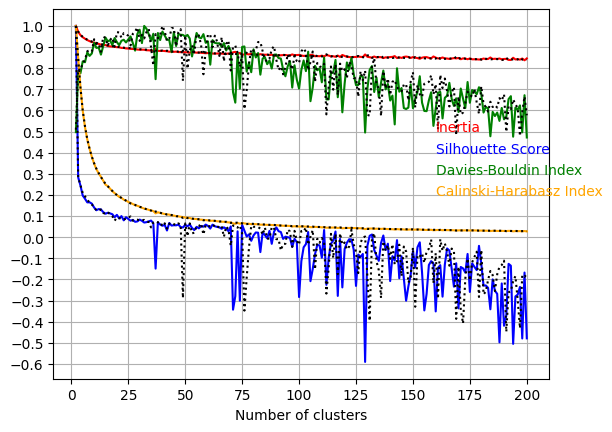

In [79]:
x = 160
y = 0.5
plt.plot(n_clusters, scores3[:, 0]/np.max(scores3[:, 0]), color="red", )
plt.text(x, y - 0 * 0.1, 'Inertia', color='red')

plt.plot(n_clusters, scores3[:, 1]/np.max(scores3[:, 1]), color="blue")
plt.text(x, y - 1 * 0.1, 'Silhouette Score', color='blue')

plt.plot(n_clusters, scores3[:, 2]/np.max(scores3[:, 2]), color="green")
plt.text(x, y - 2 * 0.1, 'Davies-Bouldin Index', color='green')

plt.plot(n_clusters, scores3[:, 3]/np.max(scores3[:, 3]), color="orange")
plt.text(x, y - 3 * 0.1, 'Calinski-Harabasz Index', color='orange')


plt.plot(n_clusters, scores[:, 0]/np.max(scores[:, 0]), color="black", linestyle="dotted")
plt.plot(n_clusters, scores[:, 1]/np.max(scores[:, 1]), color="black", linestyle="dotted")
plt.plot(n_clusters, scores[:, 2]/np.max(scores[:, 2]), color="black", linestyle="dotted")
plt.plot(n_clusters, scores[:, 3]/np.max(scores[:, 3]), color="black", linestyle="dotted")

plt.savefig("K-Means_03.png")
plt.xlabel("Number of clusters")
plt.grid("on")
plt.yticks(np.arange(-0.6, 1.01, 0.1))
plt.savefig("K-Means_04.png")
plt.show()

In [78]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(n_clusters, scores3[:, 0])
plt.plot(n_clusters, scores[:, 0], color="black", linestyle="dotted")
plt.title("Inertia")
plt.xlabel("Number of clusters")

plt.subplot(2, 2, 2)
plt.plot(n_clusters, scores3[:, 1])
plt.plot(n_clusters, scores[:, 1], color="black", linestyle="dotted")
plt.title("Silhouette Score")
plt.xlabel("Number of clusters")

plt.subplot(2, 2, 3)
plt.plot(n_clusters, scores3[:, 2])
plt.plot(n_clusters, scores[:, 2], color="black", linestyle="dotted")
plt.title("Davies-Bouldin Index")
plt.xlabel("Number of clusters")

plt.subplot(2, 2, 4)
plt.plot(n_clusters, scores3[:, 3])
plt.plot(n_clusters, scores[:, 3], color="black", linestyle="dotted")
plt.title("Calinski-Harabasz Index")
plt.xlabel("Number of clusters")

plt.savefig("K-Means_05.png")
plt.show()

# Gaussian Mixture

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [7]:
X = pd.read_csv("../Milestone_2/all_features.csv")

In [8]:
X = X.iloc[:, 2:-2]
labels, X = X["label"], X.drop("label", axis=1)
X = StandardScaler().fit_transform(X)

In [11]:
gm = GaussianMixture()

In [12]:
gm.fit(X)

GaussianMixture()

In [13]:
pred = gm.predict(X)

In [36]:
n_components = np.arange(2, 51, 1)

scores = np.zeros([n_components.shape[0], 4])

for i in range(scores.shape[0]):
    gm = GaussianMixture(n_components=n_components[i])
    gm.fit(X)
    labels = gm.predict(X)

    scores[i, 0] = gm.bic(X)
    scores[i, 1] = silhouette_score(X, labels)
    scores[i, 2] = davies_bouldin_score(X, labels)
    scores[i, 3] = calinski_harabasz_score(X, labels)

    if i % 10 == 0:
        print(n_components[i], end="-->")

2-->12-->22-->32-->42-->

In [20]:
plt.plot(n_components, scores[:, 0])
plt.show()

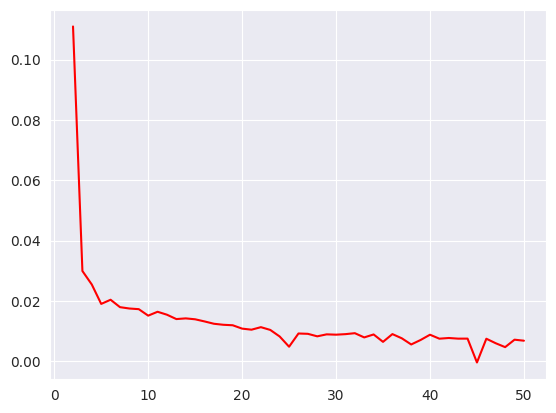

In [24]:
plt.plot(n_components, scores[:, 1], color="red")
plt.show()

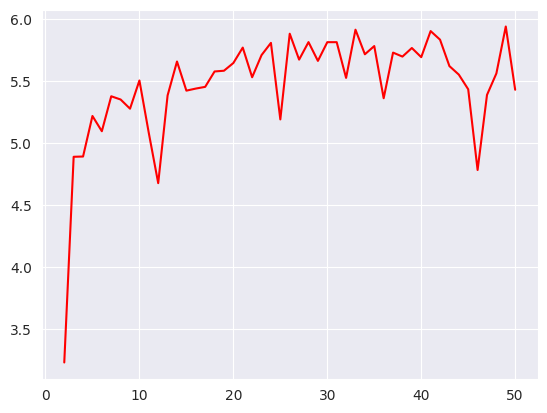

In [25]:
plt.plot(n_components, scores[:, 2], color="red")
plt.show()

In [26]:
plt.plot(n_components, scores[:, 3], color="red")
plt.show()

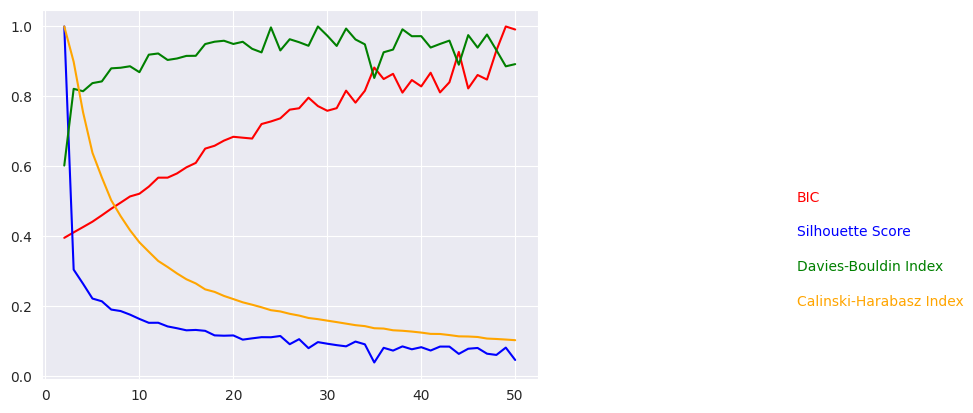

In [37]:
x = 80
y = 0.5
plt.plot(n_components, scores[:, 0] / np.max(scores[:, 0]), color="red")
plt.text(x, y - 0 * 0.1, 'BIC', color='red')

plt.plot(n_components, scores[:, 1] / np.max(scores[:, 1]), color="blue")
plt.text(x, y - 1 * 0.1, 'Silhouette Score', color='blue')

plt.plot(n_components, scores[:, 2] / np.max(scores[:, 2]), color="green")
plt.text(x, y - 2 * 0.1, 'Davies-Bouldin Index', color='green')

plt.plot(n_components, scores[:, 3] / np.max(scores[:, 3]), color="orange")
plt.text(x, y - 3 * 0.1, 'Calinski-Harabasz Index', color='orange')

plt.show()

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
X_prep = pca.fit_transform(X)

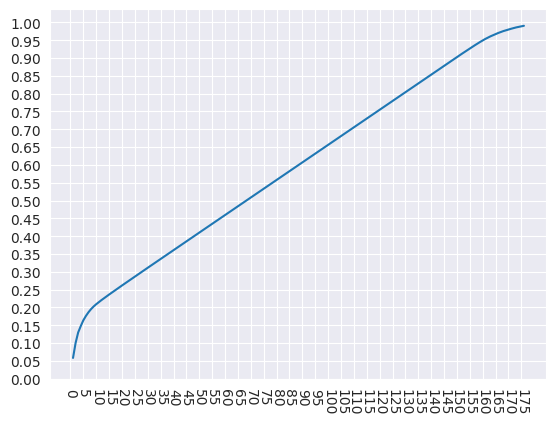

In [29]:
plt.plot(
    np.arange(pca.explained_variance_.shape[0])+1,
    np.cumsum(pca.explained_variance_ratio_)
)
plt.yticks(np.arange(0, 1.01, 0.05))
plt.xticks(np.arange(0, pca.explained_variance_.shape[0]+1, 5), rotation=-90)
plt.grid("on")

In [30]:
X_prep = X_prep[:, :165]

In [38]:
n_components = np.arange(2, 51, 1)

scores2 = np.zeros([n_components.shape[0], 4])

for i in range(scores2.shape[0]):
    gm = GaussianMixture(n_components=n_components[i])
    gm.fit(X_prep)
    labels = gm.predict(X_prep)

    scores2[i, 0] = gm.bic(X_prep)
    scores2[i, 1] = silhouette_score(X_prep, labels)
    scores2[i, 2] = davies_bouldin_score(X_prep, labels)
    scores2[i, 3] = calinski_harabasz_score(X_prep, labels)

    if i % 10 == 0:
        print(n_components[i], end="-->")

2-->12-->22-->32-->42-->

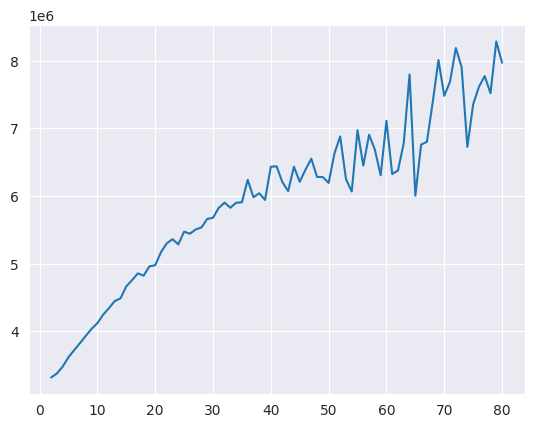

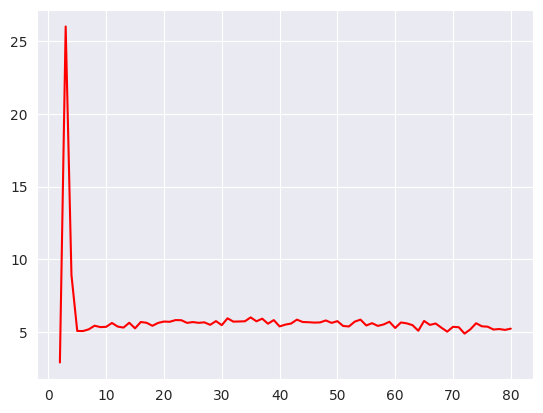

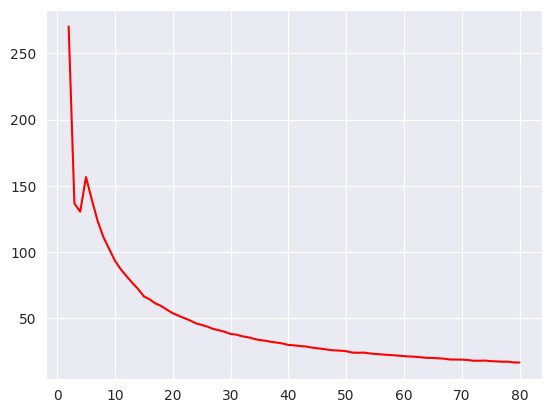

In [32]:
plt.plot(n_components, scores2[:, 0])
plt.show()
plt.plot(n_components, scores2[:, 1], color="red")
plt.show()
plt.plot(n_components, scores2[:, 2], color="red")
plt.show()
plt.plot(n_components, scores2[:, 3], color="red")
plt.show()

In [39]:
x = 80
y = 0.5
plt.plot(n_components, scores2[:, 0] / np.max(scores2[:, 0]), color="red")
plt.text(x, y - 0 * 0.1, 'BIC', color='red')

plt.plot(n_components, scores2[:, 1] / np.max(scores2[:, 1]), color="blue")
plt.text(x, y - 1 * 0.1, 'Silhouette Score', color='blue')

plt.plot(n_components, scores2[:, 2] / np.max(scores2[:, 2]), color="green")
plt.text(x, y - 2 * 0.1, 'Davies-Bouldin Index', color='green')

plt.plot(n_components, scores2[:, 3] / np.max(scores2[:, 3]), color="orange")
plt.text(x, y - 3 * 0.1, 'Calinski-Harabasz Index', color='orange')

plt.show()

In [40]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(n_components, scores2[:, 0])
plt.plot(n_components, scores[:, 0], color="black", linestyle="dotted")
plt.title("BIC")
plt.xlabel("Number of components")

plt.subplot(2, 2, 2)
plt.plot(n_components, scores2[:, 1])
plt.plot(n_components, scores[:, 1], color="black", linestyle="dotted")
plt.title("Silhouette Score")
plt.xlabel("Number of components")

plt.subplot(2, 2, 3)
plt.plot(n_components, scores2[:, 2])
plt.plot(n_components, scores[:, 2], color="black", linestyle="dotted")
plt.title("Davies-Bouldin Index")
plt.xlabel("Number of components")

plt.subplot(2, 2, 4)
plt.plot(n_components, scores2[:, 3])
plt.plot(n_components, scores[:, 3], color="black", linestyle="dotted")
plt.title("Calinski-Harabasz Index")
plt.xlabel("Number of components")

Text(0.5, 0, 'Number of components')

In [54]:
gm = GaussianMixture(n_components=2)
gm.fit(X_prep)
pred = gm.predict(X_prep)

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_prep)

In [58]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_2d[:, 0],
    X_2d[:, 1],
    c=pred,
    cmap='tab10',
    s=40,
    alpha=0.7
)

plt.title('Predicted Clustering Visualization')
plt.grid(True)
plt.show()

# DBSCAN

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [2]:
X = pd.read_csv("../Milestone_2/all_features.csv")

In [3]:
X.head()

Unnamed: 0.1     filename                     label       ASM     contrast  \
0             0  Image_1.jpg          SOUTHERN DOGFACE  0.000520   225.271447   
1             1  Image_2.jpg                    ADONIS  0.000193   896.546635   
2             2  Image_3.jpg            BROWN SIPROETA  0.004830   270.958244   
3             3  Image_4.jpg                   MONARCH  0.000272  1329.045213   
4             4  Image_5.jpg  GREEN CELLED CATTLEHEART  0.005858   825.113118   

   correlation      variance  homogeneity  sum_average  sum_variance  ...  \
0     0.975459   4590.227562     0.255875   234.381672  18135.638803  ...   
1     0.879080   3706.946471     0.141954   238.754102  13931.239250  ...   
2     0.980938   7107.513638     0.390153   296.217951  28159.096306  ...   
3     0.882228   5642.199427     0.213191   298.740987  21239.752496  ...   
4     0.962291  10941.203441     0.328611   267.948943  42939.700647  ...   

       6397        645        706        716        809        851        916  \
0 -0.106018   1.485386  -3.574178  -2.148077  -7.703506  -3.626086  -9.860100   
1  0.056109   3.416929  -2.565523   0.108830   4.978515   4.474832  12.541668   
2 -0.833056  11.383557   3.568245  11.023996  -7.512587  -7.007218 -10.410913   
3  0.002435   8.284797  15.961159   0.285843 -16.601744  11.426028   4.654343   
4  2.735740  -3.427727   0.850464  -8.847474  -7.627993  -6.294594  -4.557978   

         975           label.1      filename.1  
0  -0.052879  SOUTHERN DOGFACE     Image_1.jpg  
1   4.487264       RED POSTMAN    Image_10.jpg  
2  -4.000995       COPPER TAIL   Image_100.jpg  
3 -11.825953     SLEEPY ORANGE  Image_1000.jpg  
4  -0.866165       RED CRACKER  Image_1001.jpg  

[5 rows x 208 columns]

In [4]:
X = X.iloc[:, 2:-2]

In [5]:
X, labels = X.drop("label", axis=1), X["label"]

In [6]:
sc = StandardScaler()

In [7]:
X = sc.fit_transform(X)

In [8]:
dbscan = DBSCAN()

In [9]:
dbscan.fit(X)

DBSCAN()

In [10]:
dbscan.components_

array([], shape=(0, 203), dtype=float64)

In [11]:
preds = dbscan.fit_predict(X)

In [12]:
np.mean(preds == -1)

np.float64(1.0)

In [13]:
for eps in range(1, 18, 1):
    dbscan = DBSCAN(eps=eps)
    preds = dbscan.fit_predict(X)
    print(f"{eps:>5} -> Fraction of outliers: {np.mean(preds == -1):.2f}")

    1 -> Fraction of outliers: 1.00
    2 -> Fraction of outliers: 1.00
    3 -> Fraction of outliers: 1.00
    4 -> Fraction of outliers: 1.00
    5 -> Fraction of outliers: 1.00
    6 -> Fraction of outliers: 1.00
    7 -> Fraction of outliers: 1.00
    8 -> Fraction of outliers: 1.00
    9 -> Fraction of outliers: 1.00
   10 -> Fraction of outliers: 1.00
   11 -> Fraction of outliers: 1.00
   12 -> Fraction of outliers: 0.99
   13 -> Fraction of outliers: 0.98
   14 -> Fraction of outliers: 0.87
   15 -> Fraction of outliers: 0.52
   16 -> Fraction of outliers: 0.15
   17 -> Fraction of outliers: 0.02


In [14]:
min_samples_list = np.arange(2, 21, 1)
epss = np.arange(10, 19.01, 0.5)

n_clusters_1st = np.zeros([epss.shape[0], min_samples_list.shape[0]])
fraction_of_outliers_1st = np.zeros([epss.shape[0], min_samples_list.shape[0]])

row = 0
for eps in epss:
    column = 0
    for min_samples in min_samples_list:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        preds = dbscan.fit_predict(X)

        n_clusters_1st[row, column] = np.unique(preds).shape[0] - 1
        fraction_of_outliers_1st[row, column] = np.mean(preds == -1)

        column +=1

    row += 1
    print(row, end="-->")

1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->

In [58]:
plt.figure(figsize = (24, int(1.5*min_samples_list.shape[0])))

for counter in range(min_samples_list.shape[0]):
    plt.subplot(int(np.ceil(min_samples_list.shape[0]/4)), 4, counter + 1)
    plt.plot(n_clusters_1st[:, counter], fraction_of_outliers_1st[:, counter], zorder=1)
    plt.scatter(n_clusters_1st[:, counter], fraction_of_outliers_1st[:, counter], color="red", s=10, zorder=2)
    plt.xlabel("Number of clusters")
    plt.ylabel("Fraction of outliers")
    plt.yticks(np.arange(0, 1.01, 0.1))
    plt.ylim([0, 1])
    plt.grid("on")
    plt.title(f"Min samples : {min_samples_list[counter]}")

    for i in range(0, n_clusters.shape[0], 2):
        plt.text(n_clusters_1st[i, counter], fraction_of_outliers_1st[i, counter], epss[i], ha='center', fontsize=9, zorder=3)
    

In [35]:
from sklearn.decomposition import PCA

In [48]:
pca = PCA(n_components=0.99)

In [49]:
X_prep = pca.fit_transform(X)

In [50]:
X_prep.shape, X.shape

((6499, 176), (6499, 203))

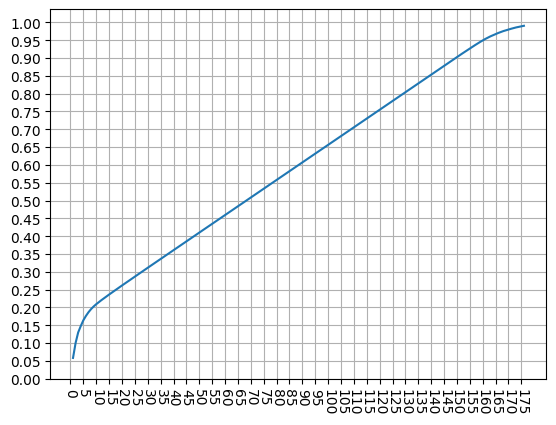

In [53]:
plt.plot(
    np.arange(pca.explained_variance_.shape[0])+1,
    np.cumsum(pca.explained_variance_ratio_)
)
plt.yticks(np.arange(0, 1.01, 0.05))
plt.xticks(np.arange(0, pca.explained_variance_.shape[0]+1, 5), rotation=-90)
plt.grid("on")

In [54]:
X_prep = X_prep[:, :165]

In [62]:
min_samples_list = np.arange(2, 21, 1)
epss = np.arange(10, 19.01, 0.5)
n_clusters_2nd = np.zeros([epss.shape[0], min_samples_list.shape[0]])
fraction_of_outliers_2nd = np.zeros([epss.shape[0], min_samples_list.shape[0]])

row = 0
for eps in epss:
    column = 0
    for min_samples in min_samples_list:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        preds = dbscan.fit_predict(X)

        n_clusters_2nd[row, column] = np.unique(preds).shape[0]
        fraction_of_outliers_2nd[row, column] = np.mean(preds == -1)

        column +=1

    row += 1
    print(row, end="-->")

1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->

In [66]:
plt.figure(figsize = (24, int(1.5*min_samples_list.shape[0])))

for counter in range(min_samples_list.shape[0]):
    plt.subplot(int(np.ceil(min_samples_list.shape[0]/4)), 4, counter + 1)
    plt.plot(n_clusters_2nd[:, counter], fraction_of_outliers_2nd[:, counter], zorder=1)
    plt.scatter(n_clusters_2nd[:, counter], fraction_of_outliers_2nd[:, counter], color="red", s=10, zorder=2)
    plt.xlabel("Number of clusters")
    plt.ylabel("Fraction of outliers")
    plt.yticks(np.arange(0, 1.01, 0.1))
    plt.ylim([0, 1])
    plt.grid("on")
    plt.title(f"Min samples : {min_samples_list[counter]}")

    for i in range(0, n_clusters.shape[0], 2):
        plt.text(n_clusters_2nd[i, counter], fraction_of_outliers_2nd[i, counter], epss[i], ha='center', fontsize=9, zorder=3)

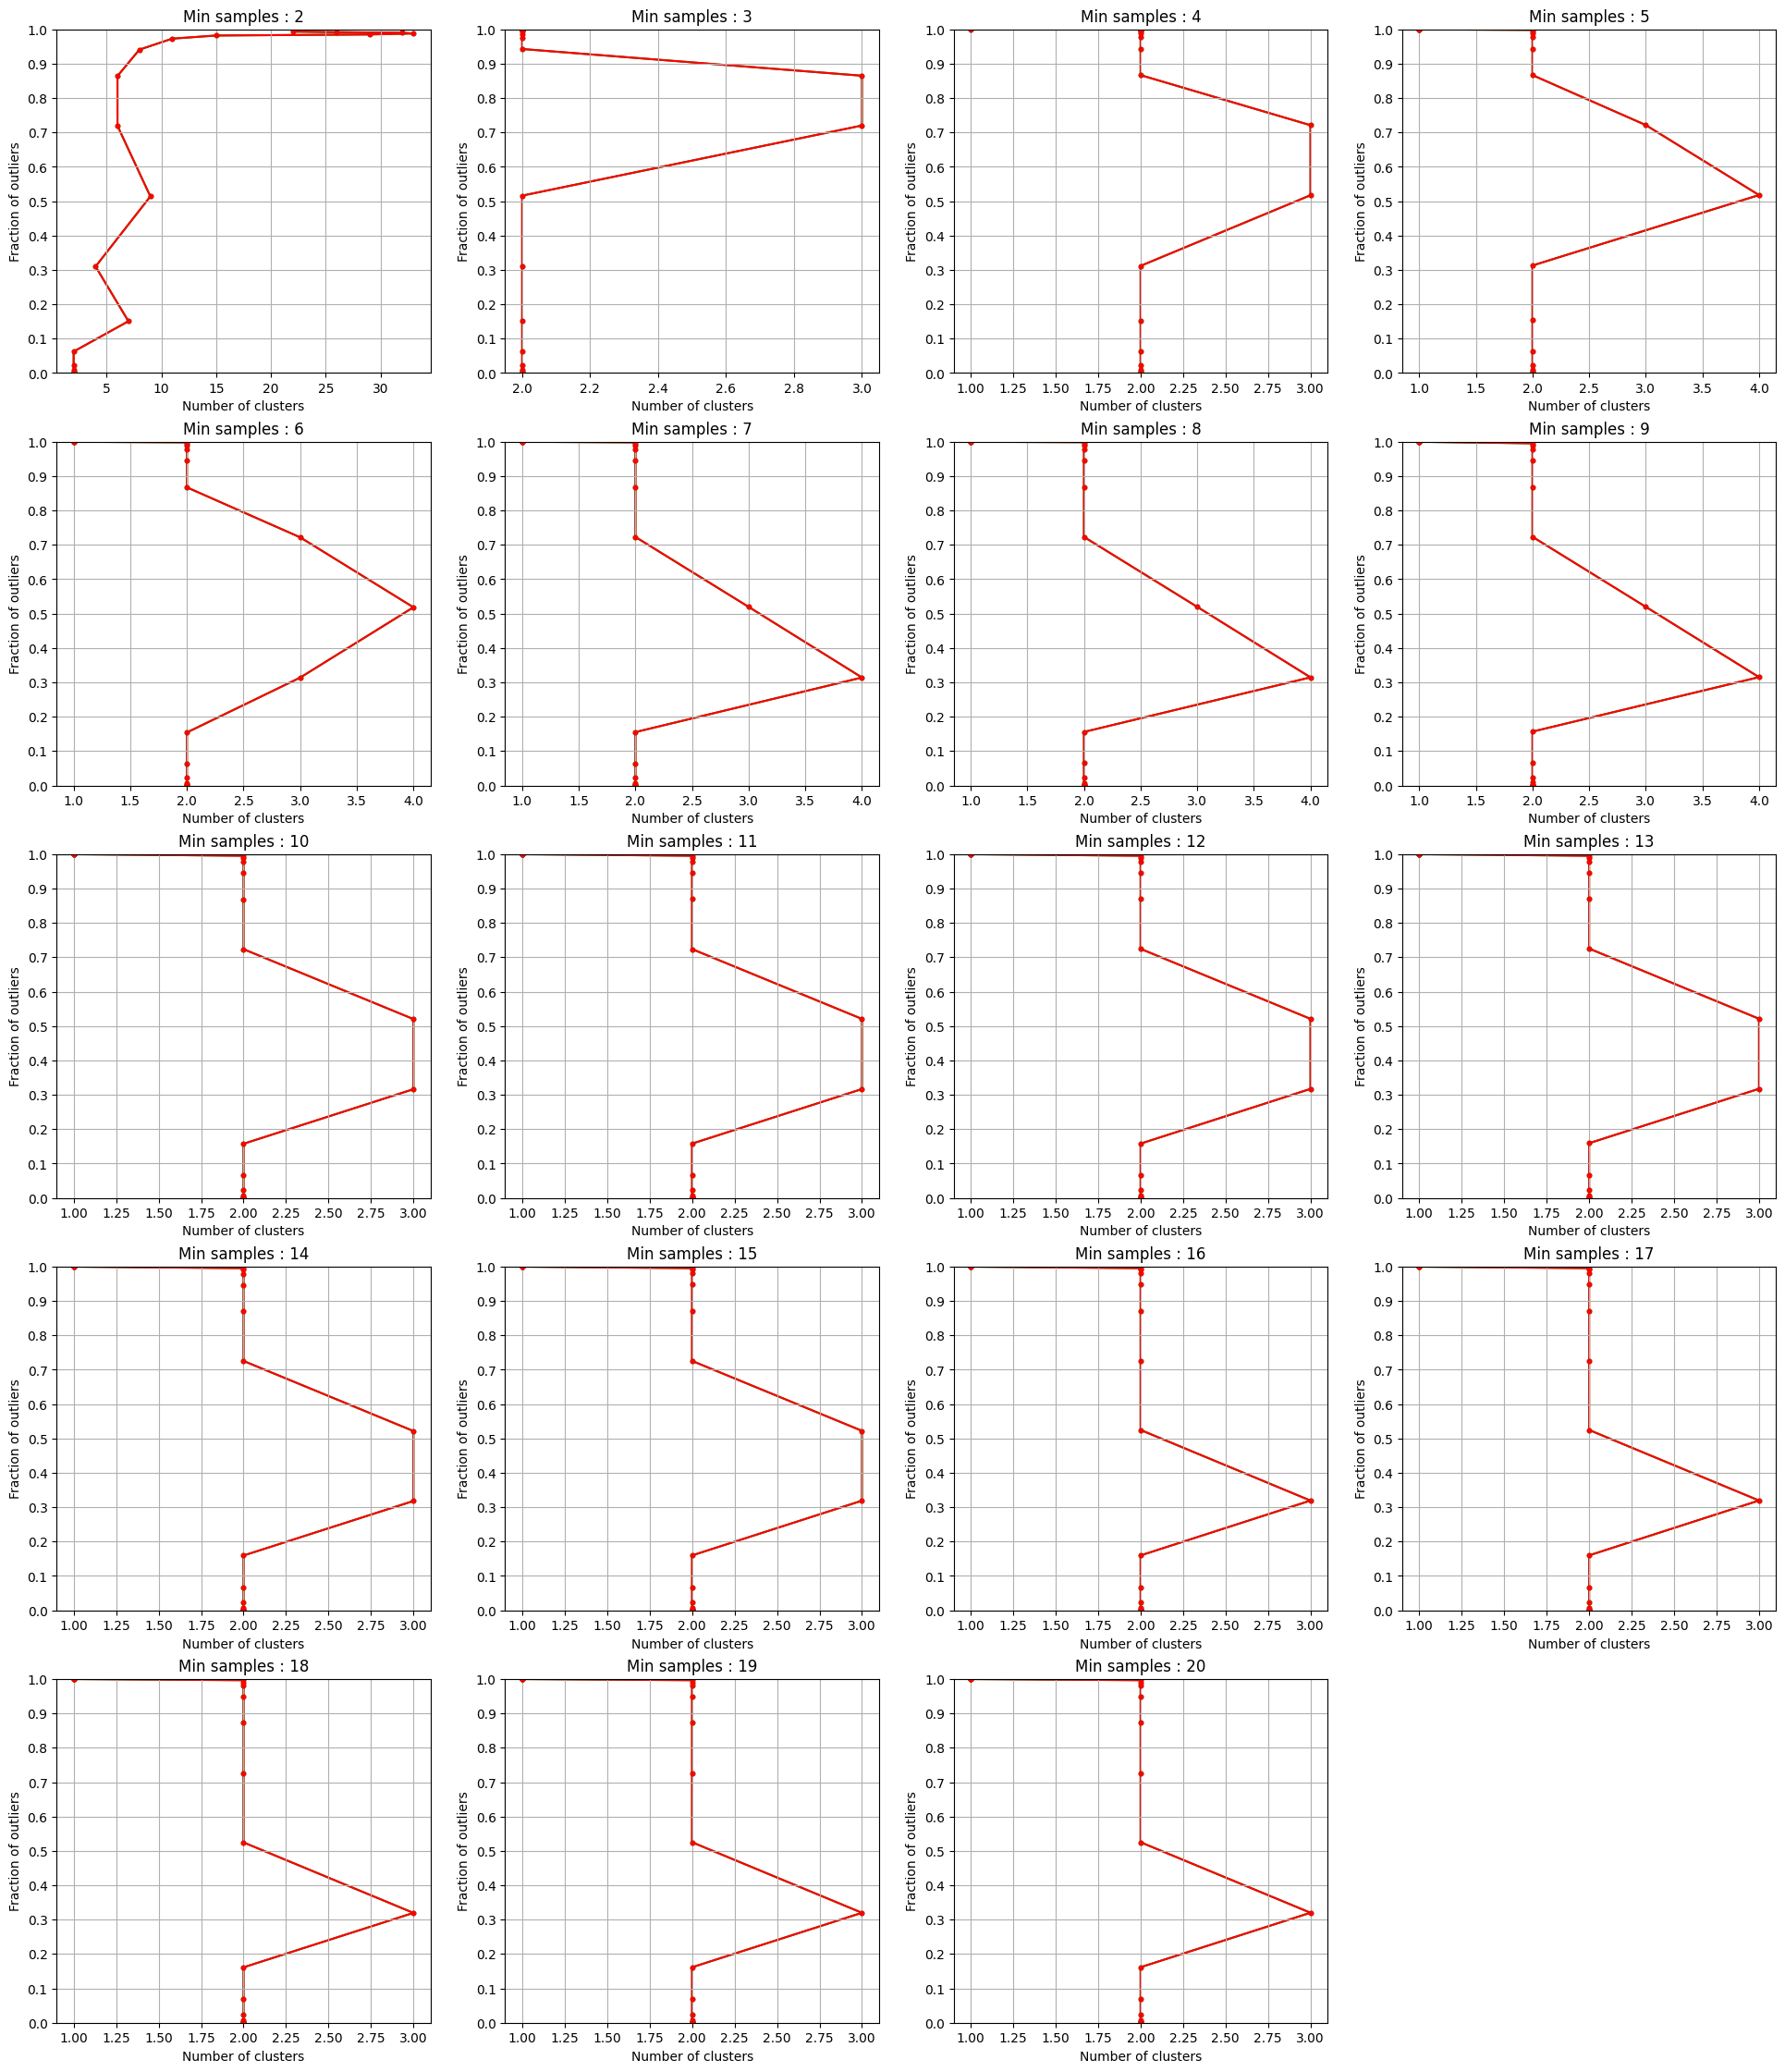

In [67]:
plt.figure(figsize = (24, int(1.5*min_samples_list.shape[0])))

for counter in range(min_samples_list.shape[0]):
    plt.subplot(int(np.ceil(min_samples_list.shape[0]/4)), 4, counter + 1)
    plt.plot(n_clusters_1st[:, counter], fraction_of_outliers_1st[:, counter], zorder=1, color="green")
    plt.scatter(n_clusters_1st[:, counter], fraction_of_outliers_1st[:, counter], color="green", s=10, zorder=2)
    
    plt.plot(n_clusters_2nd[:, counter], fraction_of_outliers_2nd[:, counter], zorder=1, color="red")
    plt.scatter(n_clusters_2nd[:, counter], fraction_of_outliers_2nd[:, counter], color="red", s=10, zorder=2)
    plt.xlabel("Number of clusters")
    plt.ylabel("Fraction of outliers")
    plt.yticks(np.arange(0, 1.01, 0.1))
    plt.ylim([0, 1])
    plt.grid("on")
    plt.title(f"Min samples : {min_samples_list[counter]}")

In [68]:
X = pd.read_csv("../Milestone_2/all_features.csv")
X = X.iloc[:, 2:-2]

In [70]:
X, labels = X.drop("label", axis=1), X["label"]

In [71]:
min_samples_list = np.arange(2, 21, 2)
epss = np.arange(1, 200, 10)
n_clusters_3 = np.zeros([epss.shape[0], min_samples_list.shape[0]])
fraction_of_outliers_3 = np.zeros([epss.shape[0], min_samples_list.shape[0]])

row = 0
for eps in epss:
    column = 0
    for min_samples in min_samples_list:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        preds = dbscan.fit_predict(X)

        n_clusters_3[row, column] = np.unique(preds).shape[0]
        fraction_of_outliers_3[row, column] = np.mean(preds == -1)

        column +=1

    row += 1
    print(row, end="-->")

1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->20-->

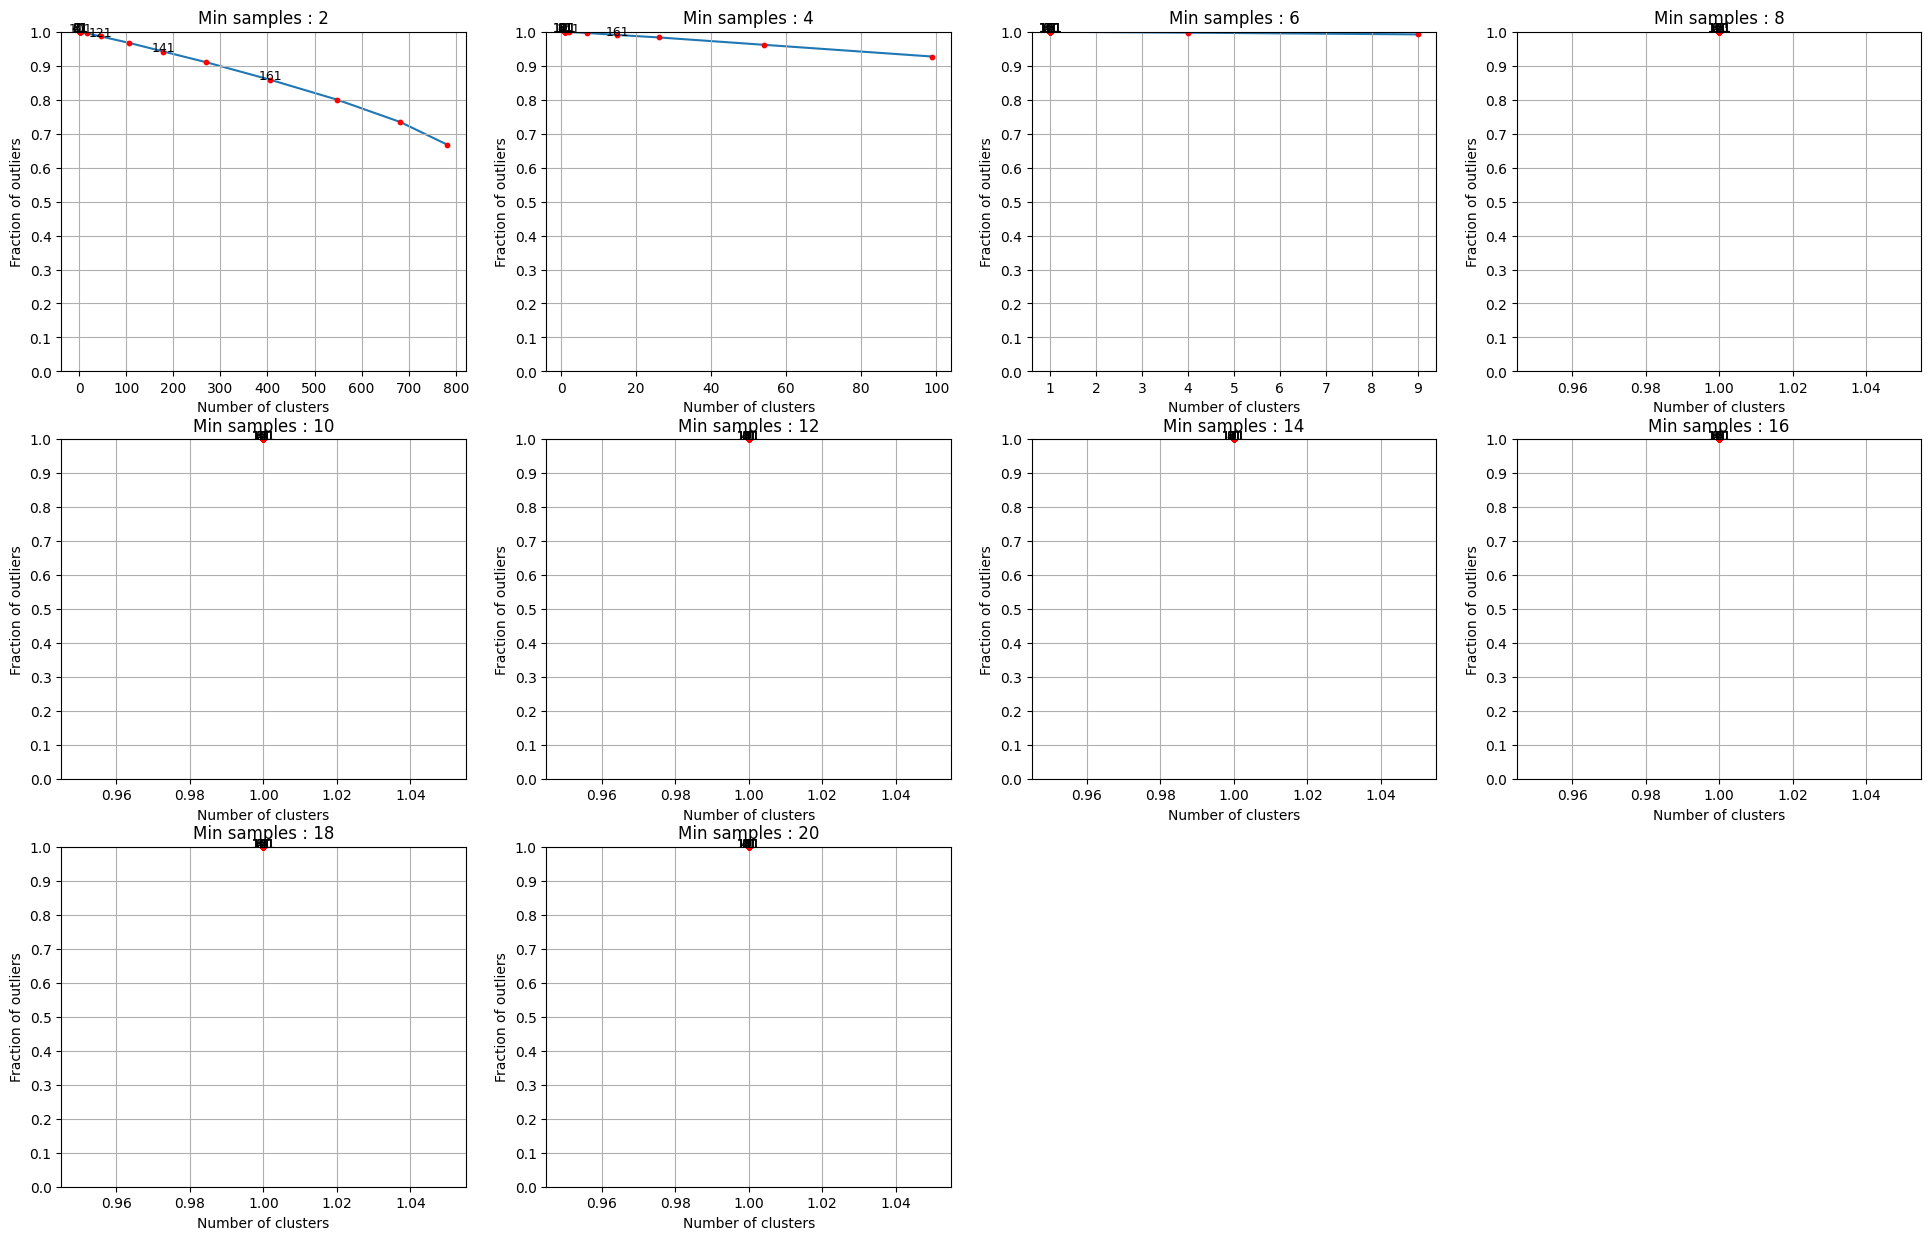

In [73]:
plt.figure(figsize = (24, int(1.5*min_samples_list.shape[0])))

for counter in range(min_samples_list.shape[0]):
    plt.subplot(int(np.ceil(min_samples_list.shape[0]/4)), 4, counter + 1)
    plt.plot(n_clusters_3[:, counter], fraction_of_outliers_3[:, counter], zorder=1)
    plt.scatter(n_clusters_3[:, counter], fraction_of_outliers_3[:, counter], color="red", s=10, zorder=2)
    plt.xlabel("Number of clusters")
    plt.ylabel("Fraction of outliers")
    plt.yticks(np.arange(0, 1.01, 0.1))
    plt.ylim([0, 1])
    plt.grid("on")
    plt.title(f"Min samples : {min_samples_list[counter]}")

    for i in range(0, n_clusters.shape[0], 2):
        plt.text(n_clusters_3[i, counter], fraction_of_outliers_3[i, counter], epss[i], ha='center', fontsize=9, zorder=3)

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv("../Milestone_2/exctracted_features.csv")

In [3]:
X.head()

Unnamed: 0       1017       1057      1060      1072      1142       1227  \
0           0   7.596840   1.260859 -2.661337 -7.354671  1.222998   8.113509   
1           1  -8.370394   2.347448  5.701302 -1.698649 -0.366418  -4.695348   
2           2   0.889431 -11.887837  3.377158 -2.897351 -2.098257   7.316988   
3           3 -11.000725   9.688002 -7.431757 -6.868082  5.614440  16.968906   
4           4  -8.828425  -0.579038 -5.670594 -1.216618  8.092880  -8.070213   

        1234      1289      1296  ...        592       645        706  \
0  -3.084675 -9.264141 -2.320445  ...   2.957865  1.485386  -3.574178   
1   1.433020  0.617948  7.137634  ...   4.208344  2.193265  11.324963   
2   1.191194 -0.274337 -3.276172  ... -11.037733  5.907992   1.040053   
3 -16.612377 -0.540022 -7.483402  ...   4.126042 -4.751497   1.590644   
4  -0.018944 -3.156159 -0.942719  ...  -7.263869  6.624819   4.773612   

        716       809       851       916       975                     label  \
0 -2.148077 -7.703506 -3.626086 -9.860100 -0.052879          SOUTHERN DOGFACE   
1 -5.484943  0.149474  2.220419  4.771445  2.288587                    ADONIS   
2 -4.742660 -0.208085 -6.707069  2.133988  0.321524            BROWN SIPROETA   
3  5.285770 -5.386302  0.330339  2.951778  2.827478                   MONARCH   
4 -4.538306 -0.354895 -2.008906  0.076045 -2.571780  GREEN CELLED CATTLEHEART   

      filename  
0  Image_1.jpg  
1  Image_2.jpg  
2  Image_3.jpg  
3  Image_4.jpg  
4  Image_5.jpg  

[5 rows x 139 columns]

In [4]:
X = X.iloc[:, 1:-1]

In [5]:
X, labels = X.drop("label", axis=1), X["label"]

In [6]:
sc = StandardScaler()

In [7]:
X = sc.fit_transform(X)

In [8]:
dbscan = DBSCAN()

In [9]:
dbscan.fit(X)

DBSCAN()

In [10]:
dbscan.components_

array([], shape=(0, 136), dtype=float64)

In [11]:
preds = dbscan.fit_predict(X)

In [12]:
np.mean(preds == -1)

np.float64(1.0)

In [14]:
for eps in range(1, 20, 5):
    dbscan = DBSCAN(eps=eps)
    preds = dbscan.fit_predict(X)
    print(f"{eps:>5} -> Fraction of outliers: {np.mean(preds == -1):.2f}")

    1 -> Fraction of outliers: 1.00
    6 -> Fraction of outliers: 1.00
   11 -> Fraction of outliers: 0.92
   16 -> Fraction of outliers: 0.00


In [16]:
min_samples_list = np.arange(2, 21, 1)
epss = np.arange(10, 16, 1)

n_clusters_1st = np.zeros([epss.shape[0], min_samples_list.shape[0]])
fraction_of_outliers_1st = np.zeros([epss.shape[0], min_samples_list.shape[0]])

row = 0
for eps in epss:
    column = 0
    for min_samples in min_samples_list:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        preds = dbscan.fit_predict(X)

        n_clusters_1st[row, column] = np.unique(preds).shape[0]
        fraction_of_outliers_1st[row, column] = np.mean(preds == -1)

        column +=1

    row += 1
    print(row, end="-->")

1-->2-->3-->4-->5-->6-->

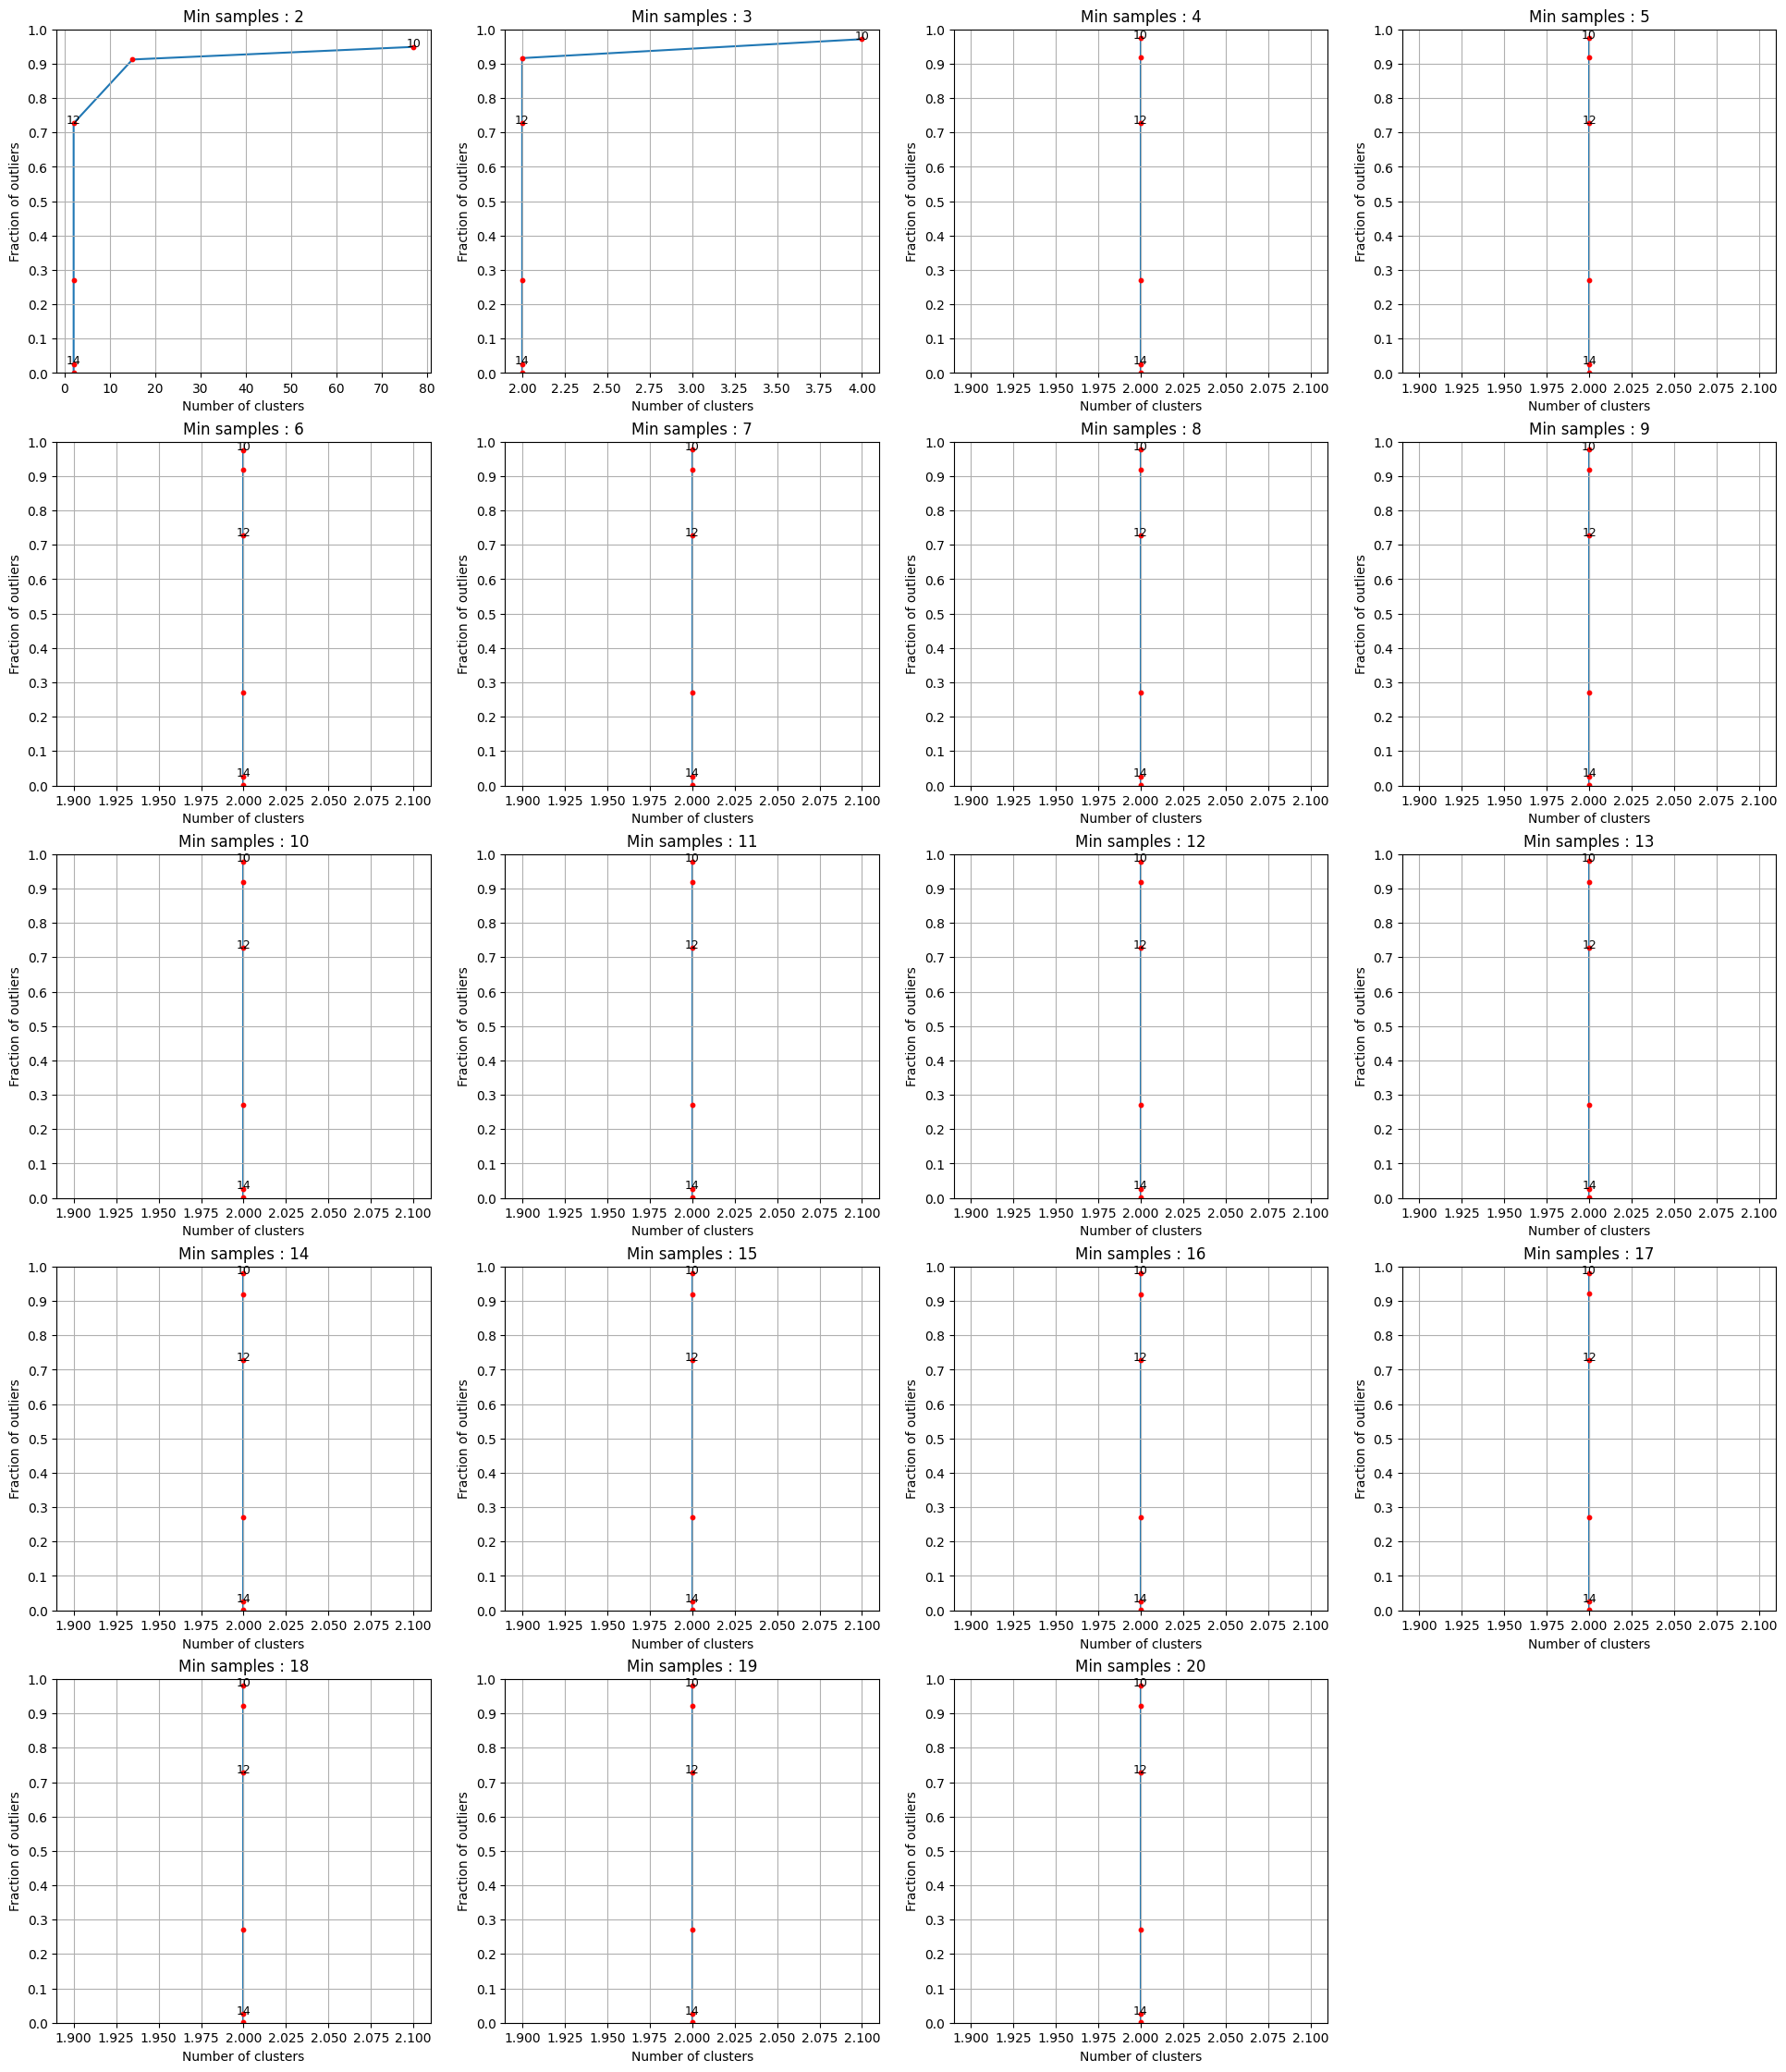

In [17]:
plt.figure(figsize = (24, int(1.5*min_samples_list.shape[0])))

for counter in range(min_samples_list.shape[0]):
    plt.subplot(int(np.ceil(min_samples_list.shape[0]/4)), 4, counter + 1)
    plt.plot(n_clusters_1st[:, counter], fraction_of_outliers_1st[:, counter], zorder=1)
    plt.scatter(n_clusters_1st[:, counter], fraction_of_outliers_1st[:, counter], color="red", s=10, zorder=2)
    plt.xlabel("Number of clusters")
    plt.ylabel("Fraction of outliers")
    plt.yticks(np.arange(0, 1.01, 0.1))
    plt.ylim([0, 1])
    plt.grid("on")
    plt.title(f"Min samples : {min_samples_list[counter]}")

    for i in range(0, n_clusters_1st.shape[0], 2):
        plt.text(n_clusters_1st[i, counter], fraction_of_outliers_1st[i, counter], epss[i], ha='center', fontsize=9, zorder=3)
    

In [27]:
for eps in range(100, 131, 5):
    dbscan = DBSCAN(eps=eps, metric='l1')
    preds = dbscan.fit_predict(X)
    print(f"{eps:>5} -> Fraction of outliers: {np.mean(preds == -1):.2f}")

  100 -> Fraction of outliers: 0.92
  105 -> Fraction of outliers: 0.85
  110 -> Fraction of outliers: 0.71
  115 -> Fraction of outliers: 0.46
  120 -> Fraction of outliers: 0.22
  125 -> Fraction of outliers: 0.06
  130 -> Fraction of outliers: 0.01


In [28]:
min_samples_list = np.arange(2, 21, 2)
epss = np.arange(100, 140, 2)

n_clusters_1st = np.zeros([epss.shape[0], min_samples_list.shape[0]])
fraction_of_outliers_1st = np.zeros([epss.shape[0], min_samples_list.shape[0]])

row = 0
for eps in epss:
    column = 0
    for min_samples in min_samples_list:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='l1')
        preds = dbscan.fit_predict(X)

        n_clusters_1st[row, column] = np.unique(preds).shape[0]
        fraction_of_outliers_1st[row, column] = np.mean(preds == -1)

        column +=1

    row += 1
    print(row, end="-->")

1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->20-->

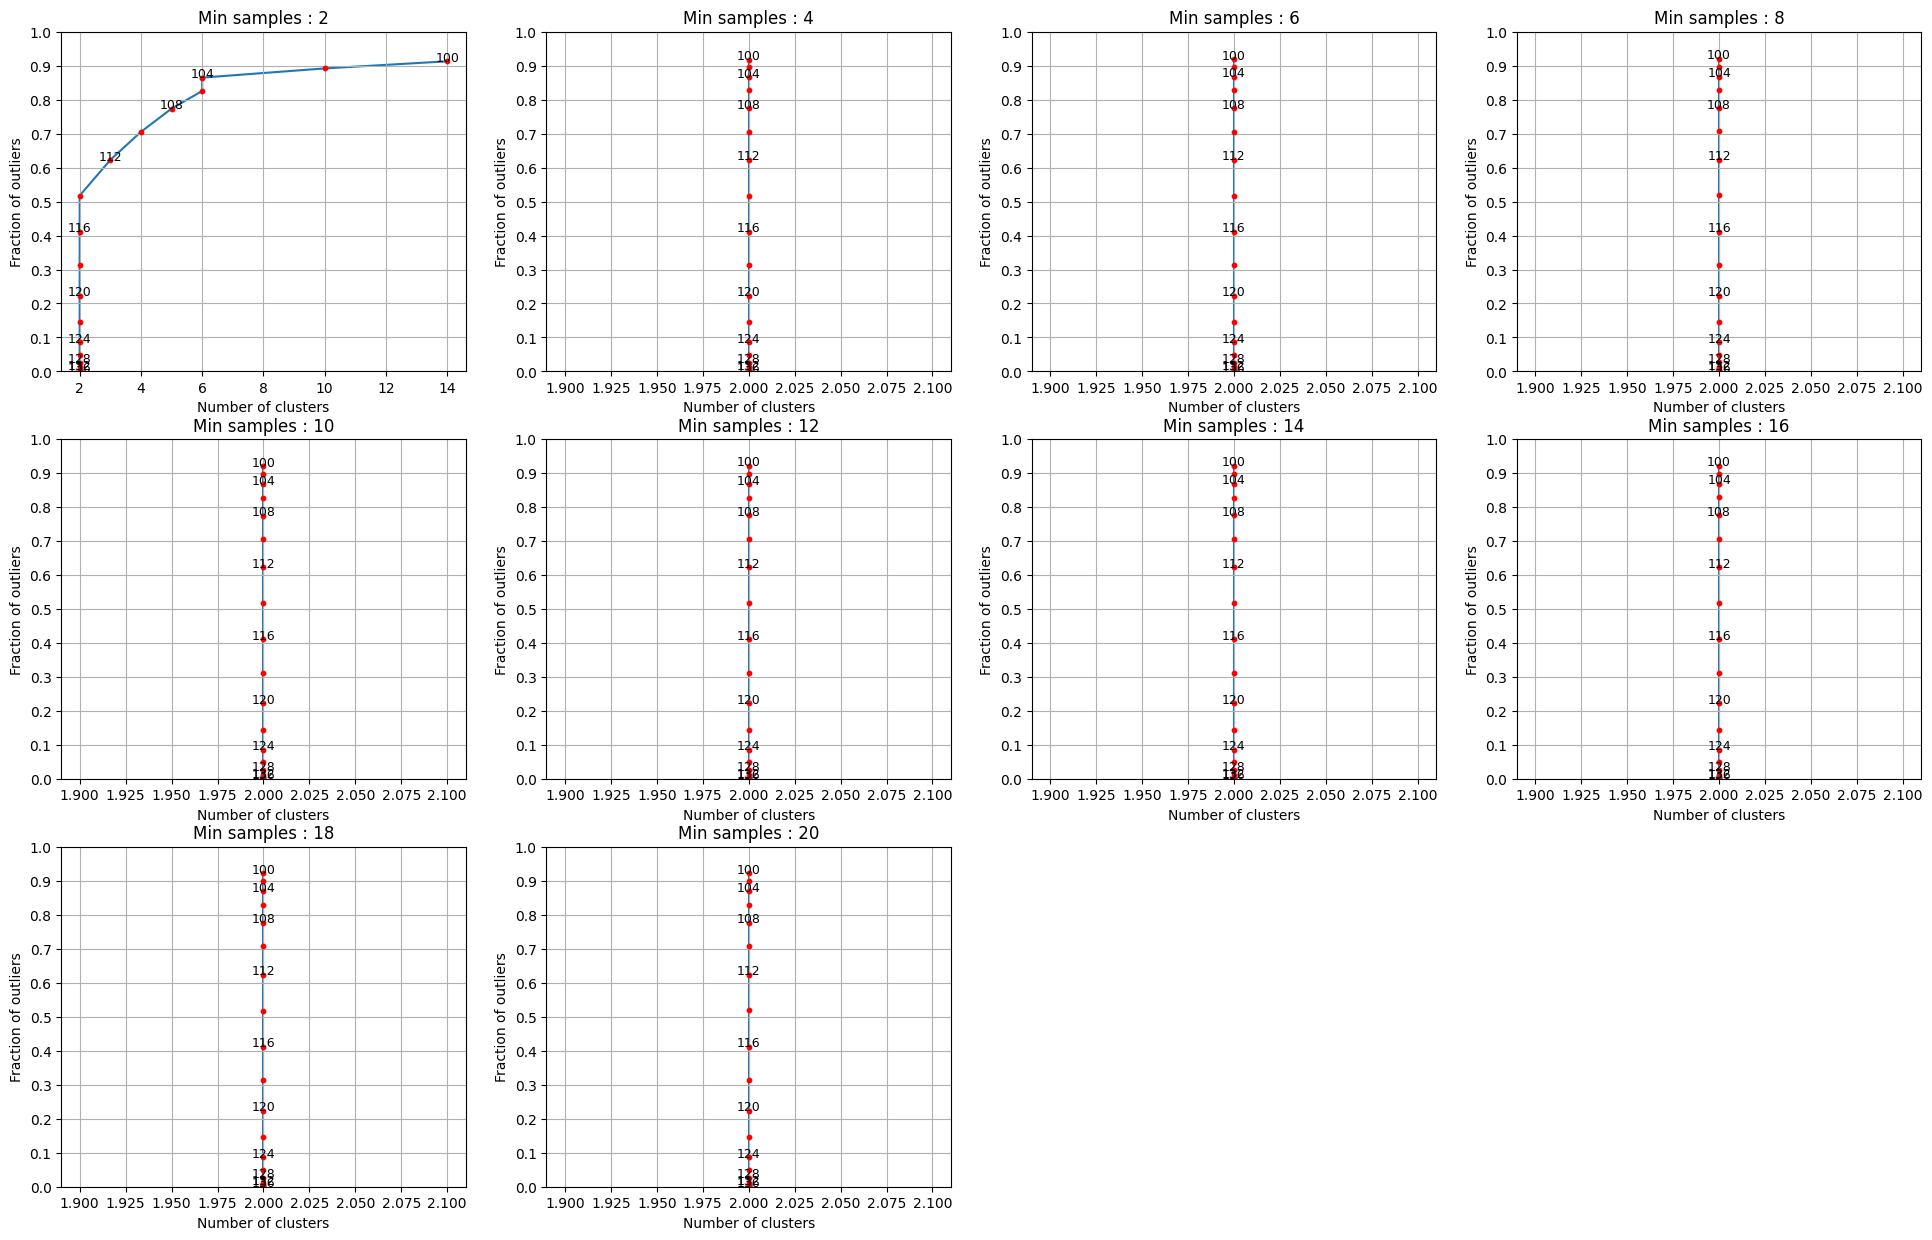

In [29]:
plt.figure(figsize = (24, int(1.5*min_samples_list.shape[0])))

for counter in range(min_samples_list.shape[0]):
    plt.subplot(int(np.ceil(min_samples_list.shape[0]/4)), 4, counter + 1)
    plt.plot(n_clusters_1st[:, counter], fraction_of_outliers_1st[:, counter], zorder=1)
    plt.scatter(n_clusters_1st[:, counter], fraction_of_outliers_1st[:, counter], color="red", s=10, zorder=2)
    plt.xlabel("Number of clusters")
    plt.ylabel("Fraction of outliers")
    plt.yticks(np.arange(0, 1.01, 0.1))
    plt.ylim([0, 1])
    plt.grid("on")
    plt.title(f"Min samples : {min_samples_list[counter]}")

    for i in range(0, n_clusters_1st.shape[0], 2):
        plt.text(n_clusters_1st[i, counter], fraction_of_outliers_1st[i, counter], epss[i], ha='center', fontsize=9, zorder=3)
    

In [55]:
from sklearn.metrics.pairwise import cosine_similarity

In [64]:
def cosine(x, y):
    x = np.array(x).reshape(1, -1)
    y = np.array(y).reshape(1, -1)
    return np.abs(cosine_similarity(x, y)[0][0])

In [73]:
min_samples_list = np.array([2, 5, 10, 15])
epss = np.arange(0.05, 1.01, 0.05)

n_clusters_1st = np.zeros([epss.shape[0], min_samples_list.shape[0]])
fraction_of_outliers_1st = np.zeros([epss.shape[0], min_samples_list.shape[0]])

row = 0
for eps in epss:
    column = 0
    for min_samples in min_samples_list:
        print('es', end='')
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=cosine)
        preds = dbscan.fit_predict(X[:1000])

        n_clusters_1st[row, column] = np.unique(preds).shape[0]
        fraction_of_outliers_1st[row, column] = np.mean(preds == -1)

        column +=1

    row += 1
    print(row, end="-->")

eseseses1-->eseseses2-->eseseses3-->eseseses4-->eseseses5-->eseseses6-->eseseses7-->eseseses8-->eseseses9-->eseseses10-->eseseses11-->eseseses12-->eseseses13-->eseseses14-->eseseses15-->eseseses16-->eseseses17-->eseseses18-->eseseses19-->eseseses20-->

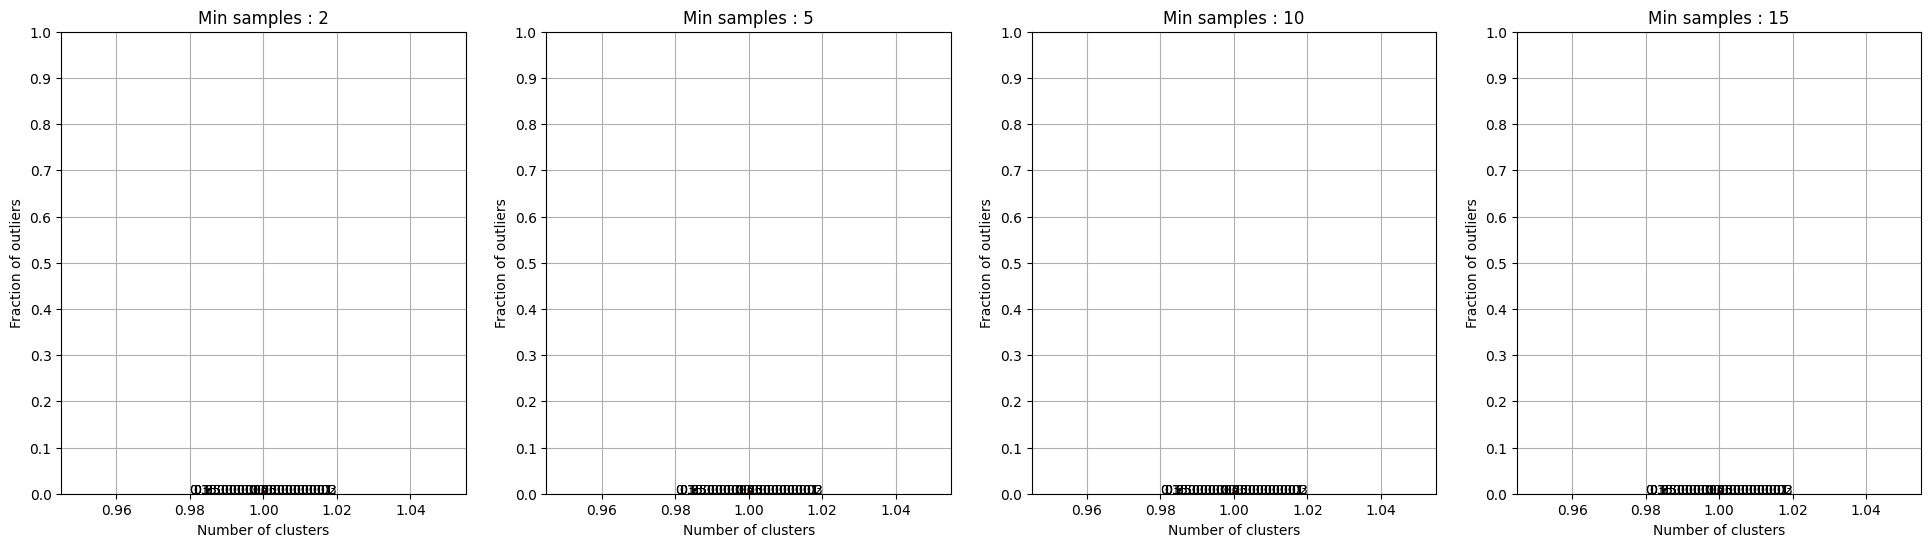

In [74]:
plt.figure(figsize = (24, int(1.5*min_samples_list.shape[0])))

for counter in range(min_samples_list.shape[0]):
    plt.subplot(int(np.ceil(min_samples_list.shape[0]/4)), 4, counter + 1)
    plt.plot(n_clusters_1st[:, counter], fraction_of_outliers_1st[:, counter], zorder=1)
    plt.scatter(n_clusters_1st[:, counter], fraction_of_outliers_1st[:, counter], color="red", s=10, zorder=2)
    plt.xlabel("Number of clusters")
    plt.ylabel("Fraction of outliers")
    plt.yticks(np.arange(0, 1.01, 0.1))
    plt.ylim([0, 1])
    plt.grid("on")
    plt.title(f"Min samples : {min_samples_list[counter]}")

    for i in range(0, n_clusters_1st.shape[0], 2):
        plt.text(n_clusters_1st[i, counter], fraction_of_outliers_1st[i, counter], epss[i], ha='center', fontsize=9, zorder=3)
    

In [75]:
np.unique(preds, return_counts=True)

(array([0]), array([1000]))

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components=0.99)

In [33]:
X_prep = pca.fit_transform(X)

In [34]:
X_prep.shape, X.shape

((6499, 135), (6499, 136))

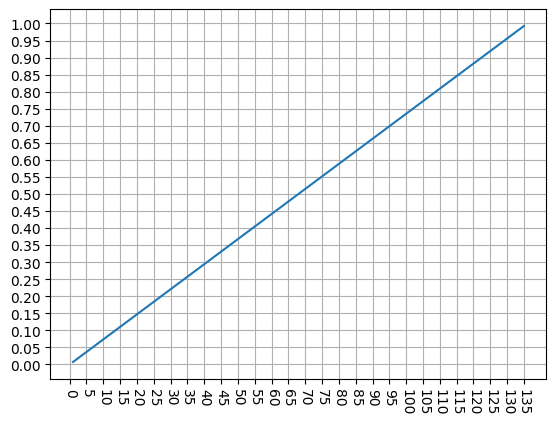

In [35]:
plt.plot(
    np.arange(pca.explained_variance_.shape[0])+1,
    np.cumsum(pca.explained_variance_ratio_)
)
plt.yticks(np.arange(0, 1.01, 0.05))
plt.xticks(np.arange(0, pca.explained_variance_.shape[0]+1, 5), rotation=-90)
plt.grid("on")

In [36]:
min_samples_list = np.arange(2, 21, 1)
epss = np.arange(10, 19.01, 0.5)
n_clusters_2nd = np.zeros([epss.shape[0], min_samples_list.shape[0]])
fraction_of_outliers_2nd = np.zeros([epss.shape[0], min_samples_list.shape[0]])

row = 0
for eps in epss:
    column = 0
    for min_samples in min_samples_list:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        preds = dbscan.fit_predict(X)

        n_clusters_2nd[row, column] = np.unique(preds).shape[0]
        fraction_of_outliers_2nd[row, column] = np.mean(preds == -1)

        column +=1

    row += 1
    print(row, end="-->")

1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->

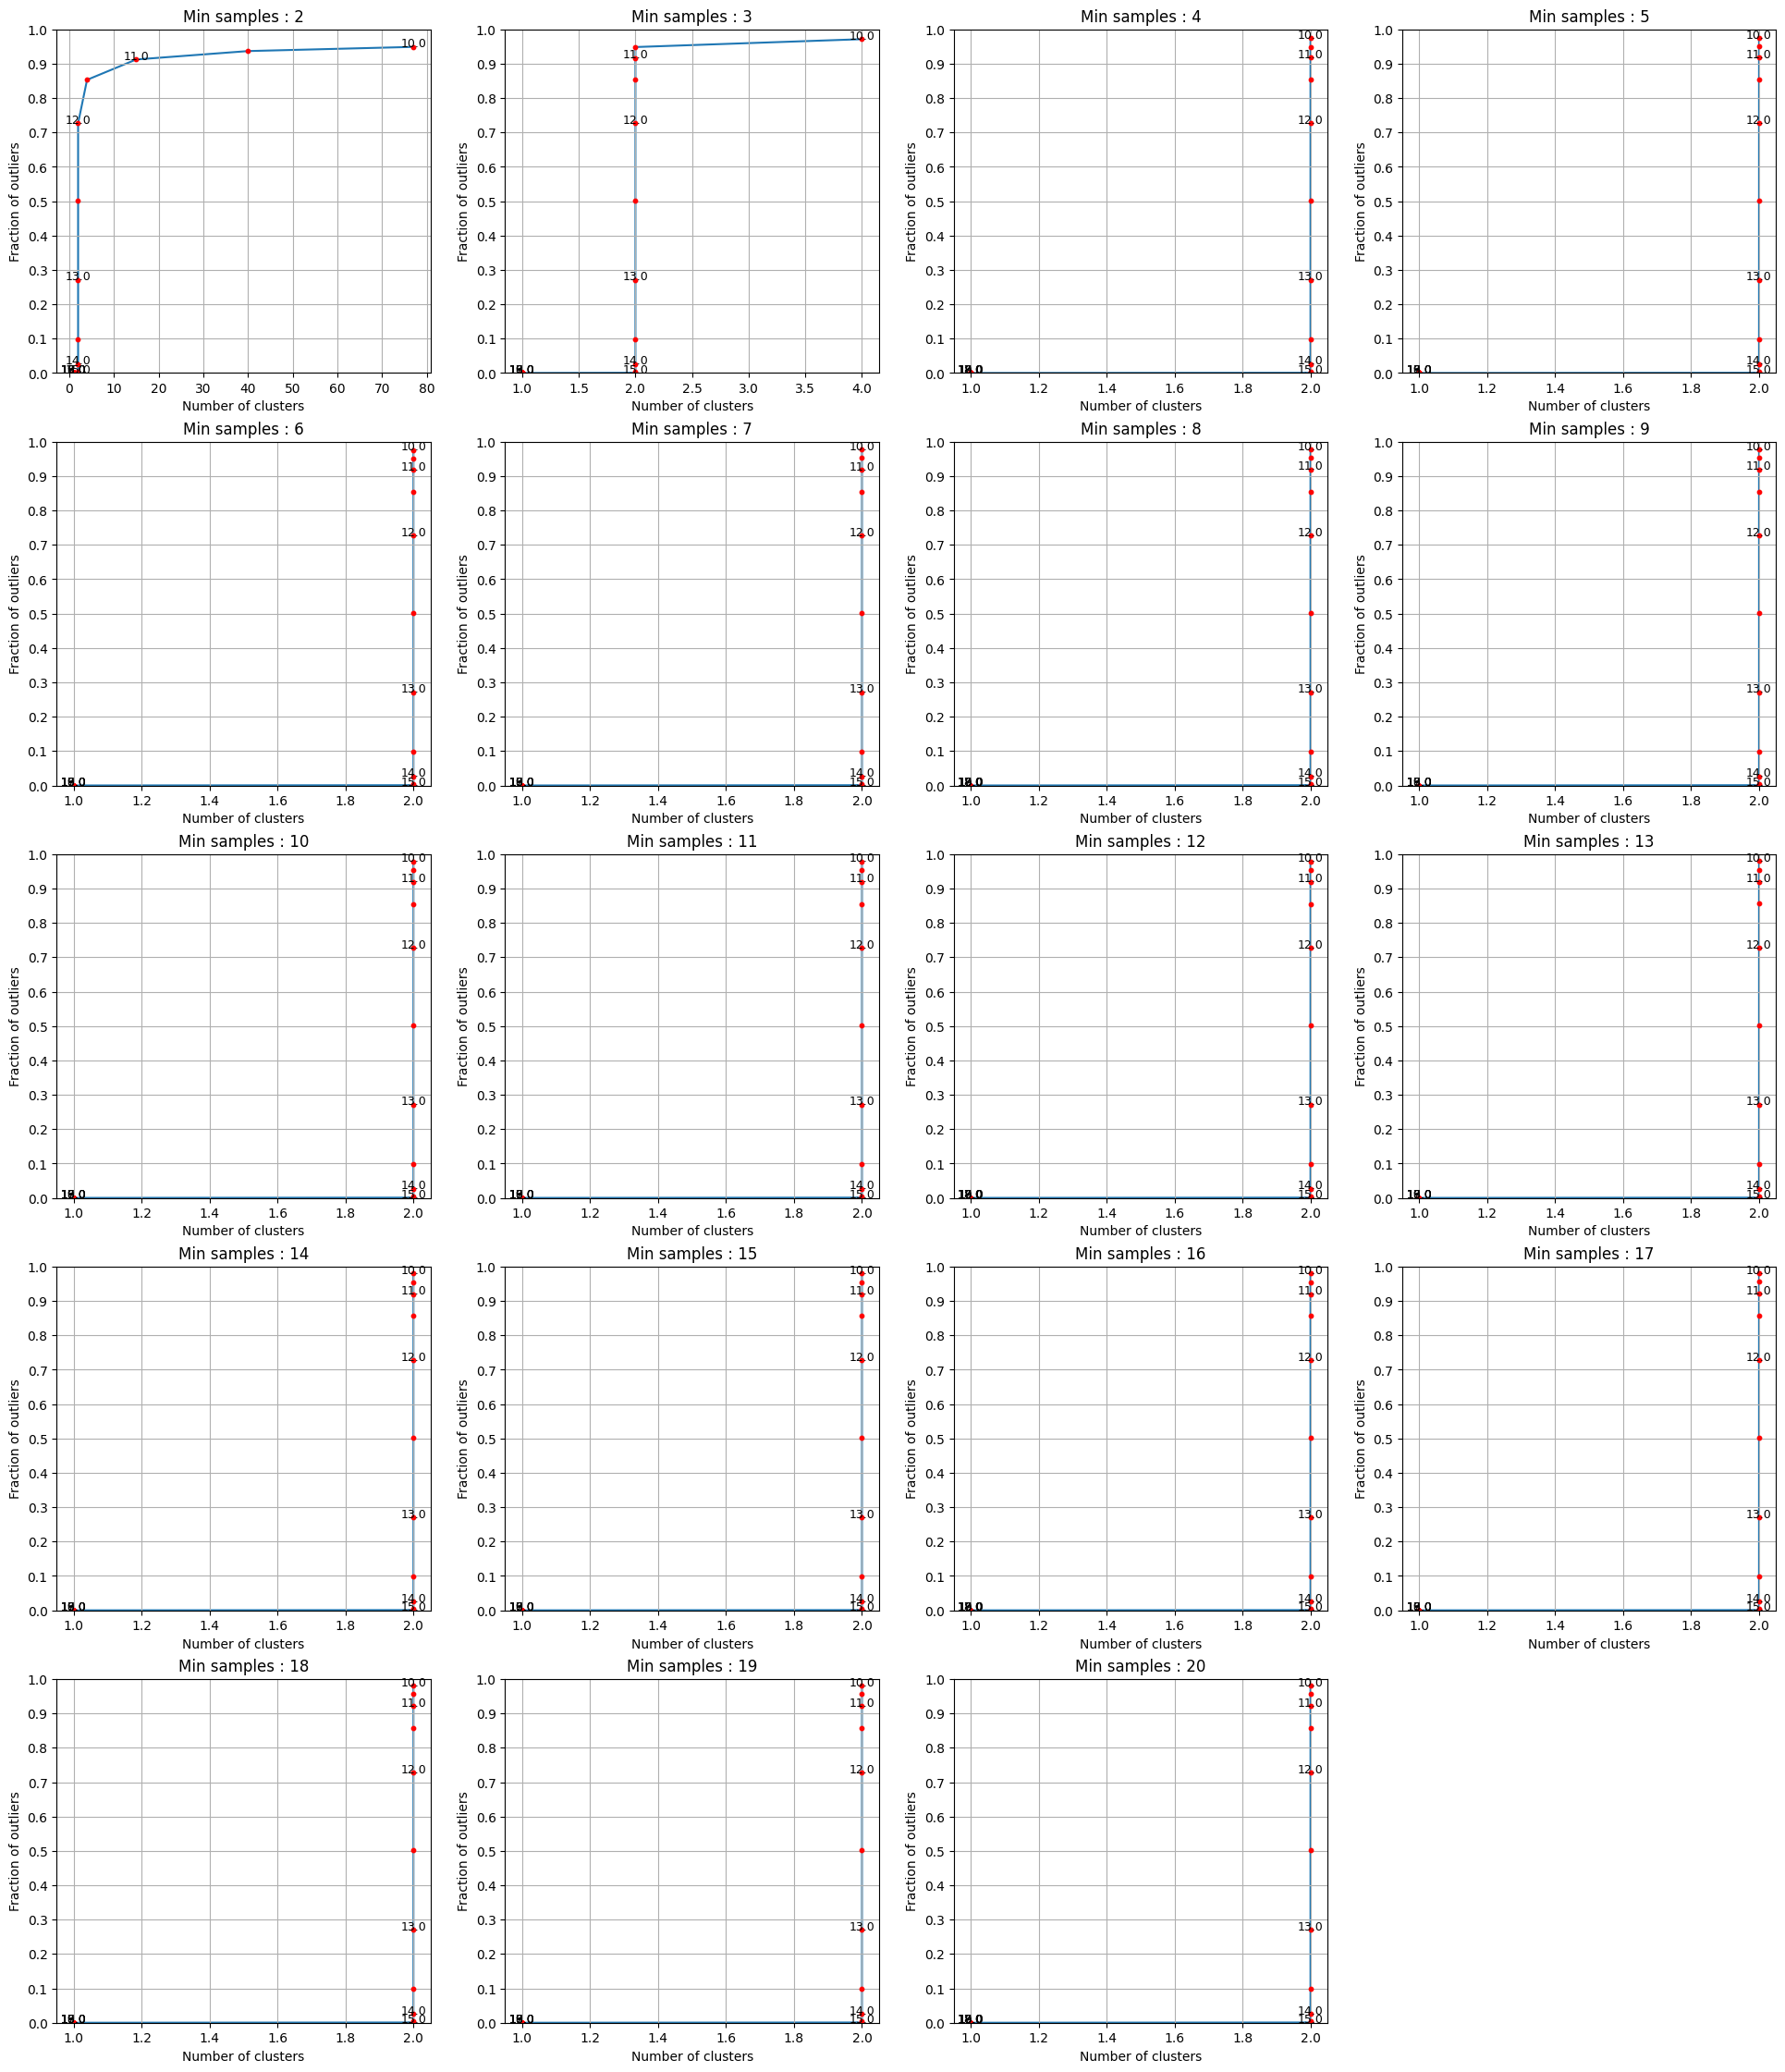

In [37]:
plt.figure(figsize = (24, int(1.5*min_samples_list.shape[0])))

for counter in range(min_samples_list.shape[0]):
    plt.subplot(int(np.ceil(min_samples_list.shape[0]/4)), 4, counter + 1)
    plt.plot(n_clusters_2nd[:, counter], fraction_of_outliers_2nd[:, counter], zorder=1)
    plt.scatter(n_clusters_2nd[:, counter], fraction_of_outliers_2nd[:, counter], color="red", s=10, zorder=2)
    plt.xlabel("Number of clusters")
    plt.ylabel("Fraction of outliers")
    plt.yticks(np.arange(0, 1.01, 0.1))
    plt.ylim([0, 1])
    plt.grid("on")
    plt.title(f"Min samples : {min_samples_list[counter]}")

    for i in range(0, n_clusters_2nd.shape[0], 2):
        plt.text(n_clusters_2nd[i, counter], fraction_of_outliers_2nd[i, counter], epss[i], ha='center', fontsize=9, zorder=3)

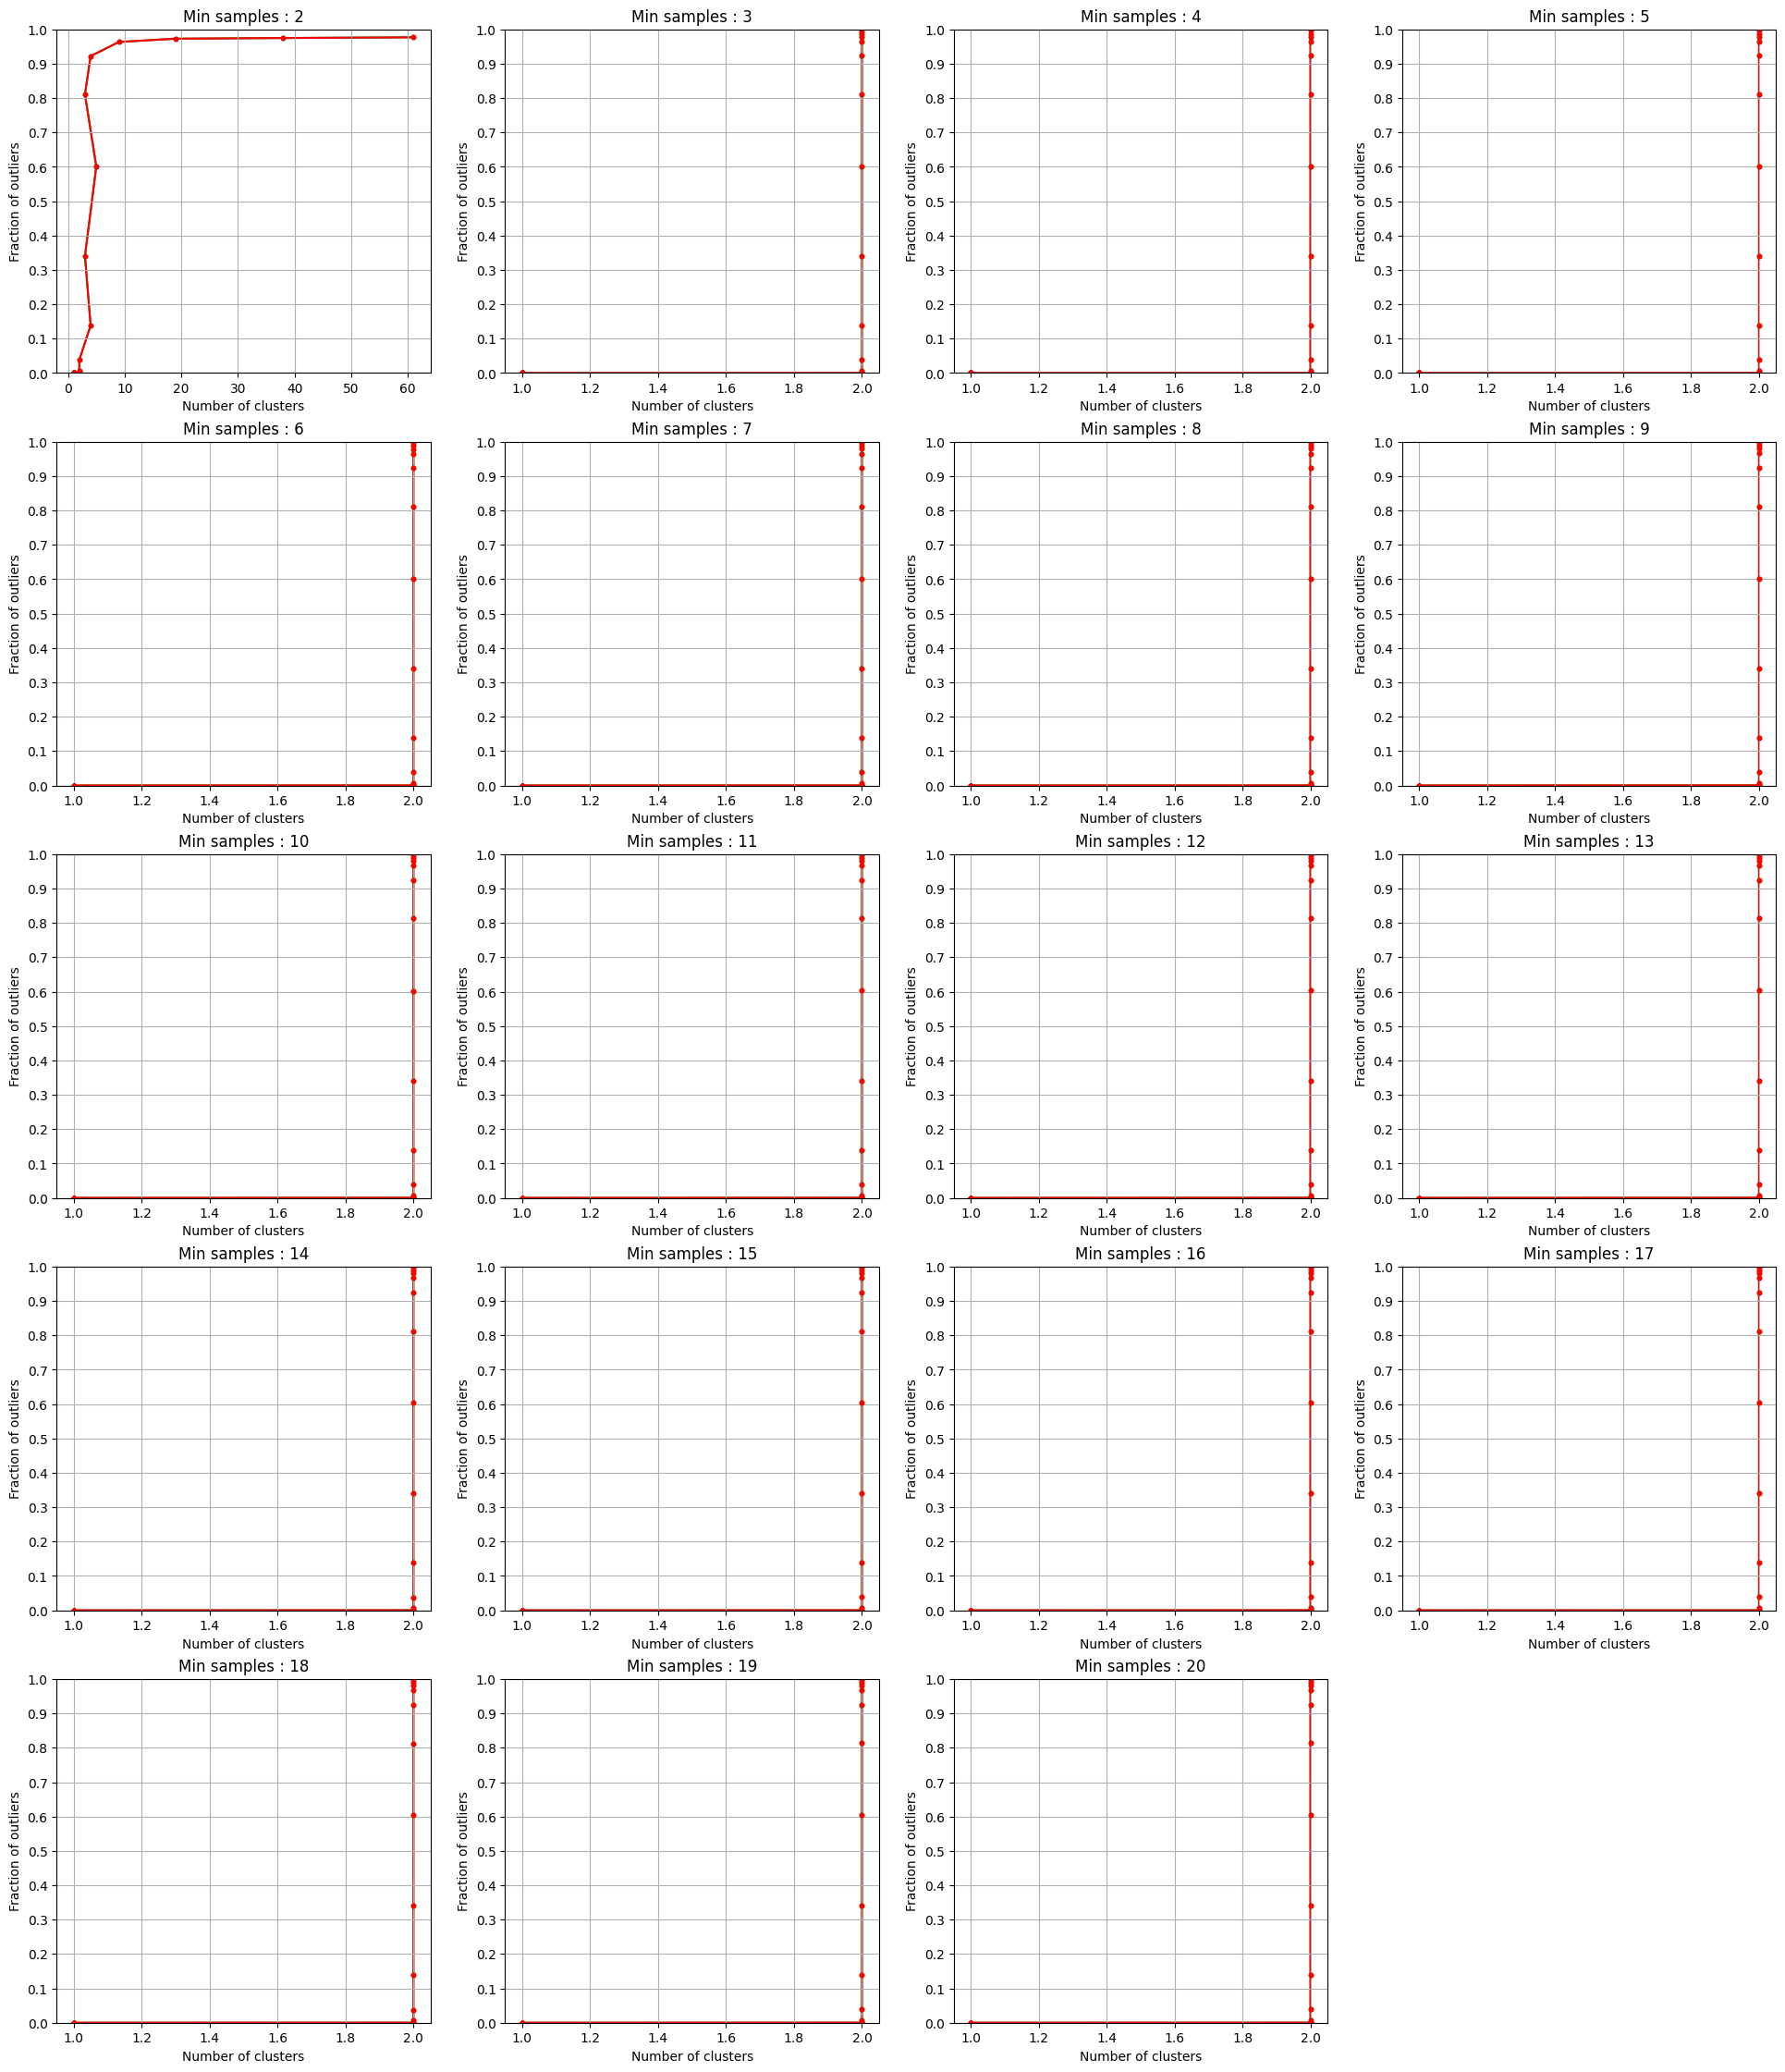

In [29]:
plt.figure(figsize = (24, int(1.5*min_samples_list.shape[0])))

for counter in range(min_samples_list.shape[0]):
    plt.subplot(int(np.ceil(min_samples_list.shape[0]/4)), 4, counter + 1)
    plt.plot(n_clusters_1st[:, counter], fraction_of_outliers_1st[:, counter], zorder=1, color="green")
    plt.scatter(n_clusters_1st[:, counter], fraction_of_outliers_1st[:, counter], color="green", s=10, zorder=2)
    
    plt.plot(n_clusters_2nd[:, counter], fraction_of_outliers_2nd[:, counter], zorder=1, color="red")
    plt.scatter(n_clusters_2nd[:, counter], fraction_of_outliers_2nd[:, counter], color="red", s=10, zorder=2)
    plt.xlabel("Number of clusters")
    plt.ylabel("Fraction of outliers")
    plt.yticks(np.arange(0, 1.01, 0.1))
    plt.ylim([0, 1])
    plt.grid("on")
    plt.title(f"Min samples : {min_samples_list[counter]}")

In [68]:
X = pd.read_csv("../Milestone_2/all_features.csv")
X = X.iloc[:, 2:-2]

In [70]:
X, labels = X.drop("label", axis=1), X["label"]

In [71]:
min_samples_list = np.arange(2, 21, 2)
epss = np.arange(1, 200, 10)
n_clusters_3 = np.zeros([epss.shape[0], min_samples_list.shape[0]])
fraction_of_outliers_3 = np.zeros([epss.shape[0], min_samples_list.shape[0]])

row = 0
for eps in epss:
    column = 0
    for min_samples in min_samples_list:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        preds = dbscan.fit_predict(X)

        n_clusters_3[row, column] = np.unique(preds).shape[0]
        fraction_of_outliers_3[row, column] = np.mean(preds == -1)

        column +=1

    row += 1
    print(row, end="-->")

1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->20-->

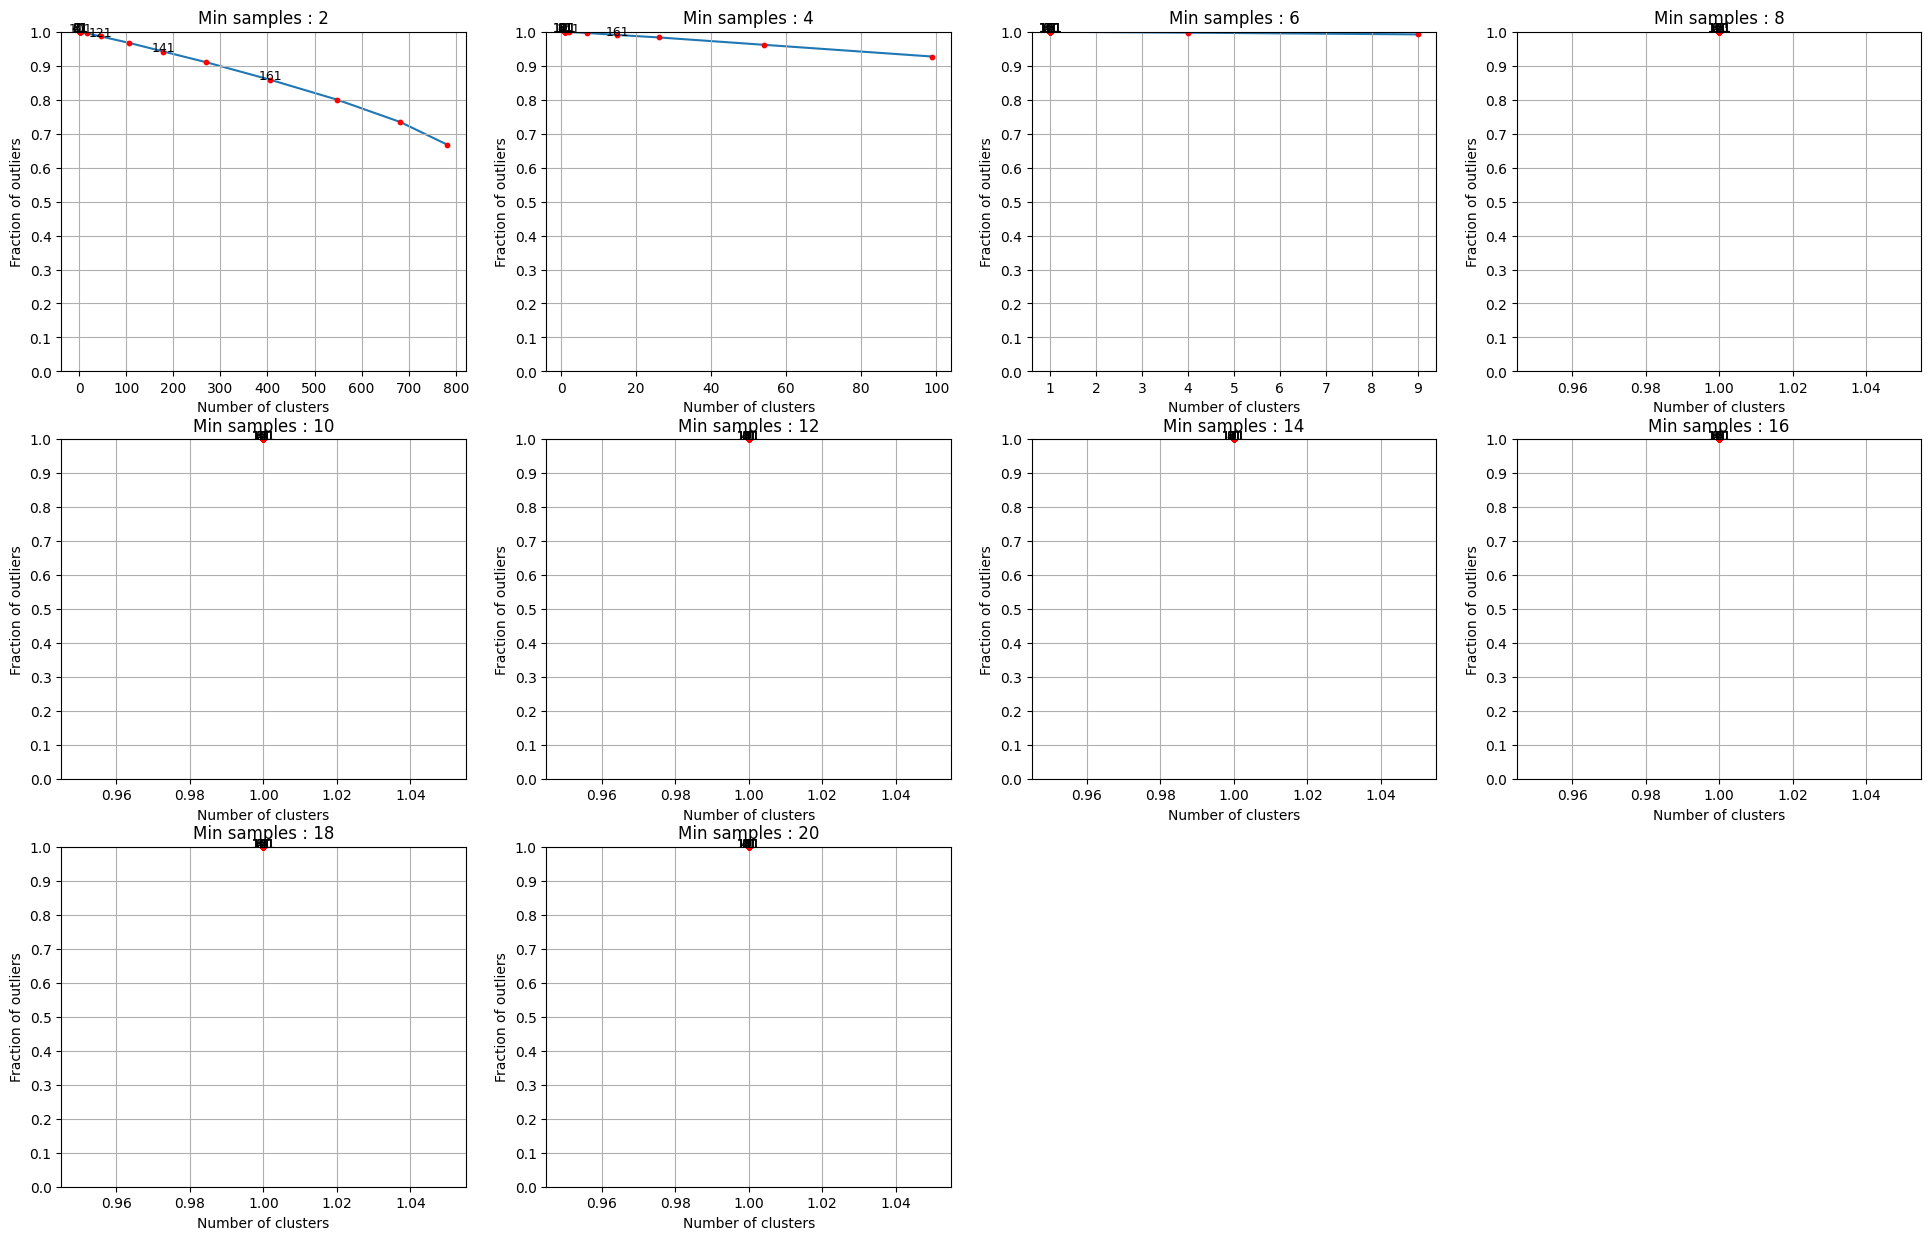

In [73]:
plt.figure(figsize = (24, int(1.5*min_samples_list.shape[0])))

for counter in range(min_samples_list.shape[0]):
    plt.subplot(int(np.ceil(min_samples_list.shape[0]/4)), 4, counter + 1)
    plt.plot(n_clusters_3[:, counter], fraction_of_outliers_3[:, counter], zorder=1)
    plt.scatter(n_clusters_3[:, counter], fraction_of_outliers_3[:, counter], color="red", s=10, zorder=2)
    plt.xlabel("Number of clusters")
    plt.ylabel("Fraction of outliers")
    plt.yticks(np.arange(0, 1.01, 0.1))
    plt.ylim([0, 1])
    plt.grid("on")
    plt.title(f"Min samples : {min_samples_list[counter]}")

    for i in range(0, n_clusters.shape[0], 2):
        plt.text(n_clusters_3[i, counter], fraction_of_outliers_3[i, counter], epss[i], ha='center', fontsize=9, zorder=3)

In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
X = pd.read_csv("../Milestone_2/all_features.csv")

In [3]:
X.head()

Unnamed: 0.1     filename                     label       ASM     contrast  \
0             0  Image_1.jpg          SOUTHERN DOGFACE  0.000520   225.271447   
1             1  Image_2.jpg                    ADONIS  0.000193   896.546635   
2             2  Image_3.jpg            BROWN SIPROETA  0.004830   270.958244   
3             3  Image_4.jpg                   MONARCH  0.000272  1329.045213   
4             4  Image_5.jpg  GREEN CELLED CATTLEHEART  0.005858   825.113118   

   correlation      variance  homogeneity  sum_average  sum_variance  ...  \
0     0.975459   4590.227562     0.255875   234.381672  18135.638803  ...   
1     0.879080   3706.946471     0.141954   238.754102  13931.239250  ...   
2     0.980938   7107.513638     0.390153   296.217951  28159.096306  ...   
3     0.882228   5642.199427     0.213191   298.740987  21239.752496  ...   
4     0.962291  10941.203441     0.328611   267.948943  42939.700647  ...   

       6397        645        706        716        809        851        916  \
0 -0.106018   1.485386  -3.574178  -2.148077  -7.703506  -3.626086  -9.860100   
1  0.056109   3.416929  -2.565523   0.108830   4.978515   4.474832  12.541668   
2 -0.833056  11.383557   3.568245  11.023996  -7.512587  -7.007218 -10.410913   
3  0.002435   8.284797  15.961159   0.285843 -16.601744  11.426028   4.654343   
4  2.735740  -3.427727   0.850464  -8.847474  -7.627993  -6.294594  -4.557978   

         975           label.1      filename.1  
0  -0.052879  SOUTHERN DOGFACE     Image_1.jpg  
1   4.487264       RED POSTMAN    Image_10.jpg  
2  -4.000995       COPPER TAIL   Image_100.jpg  
3 -11.825953     SLEEPY ORANGE  Image_1000.jpg  
4  -0.866165       RED CRACKER  Image_1001.jpg  

[5 rows x 208 columns]

In [4]:
X = X.iloc[:, 2:-2]

In [5]:
X, labels = X.drop("label", axis=1), X["label"]

In [6]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [7]:
dbscan = DBSCAN(min_samples=2, eps=16)

In [10]:
preds = dbscan.fit_predict(X)

In [12]:
np.unique(preds)

array([-1,  0,  1,  2,  3,  4,  5])

In [13]:
np.mean(preds == -1)

np.float64(0.15063855977842744)

In [14]:
np.unique(preds, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5]),
 array([ 979, 5510,    2,    2,    2,    2,    2]))

In [19]:
dbscan = DBSCAN(min_samples=8, eps=15.5)

In [20]:
preds = dbscan.fit_predict(X)
np.unique(preds, return_counts=True)

(array([-1,  0,  1,  2]), array([2044, 4427,   21,    7]))

In [22]:
pca = PCA(n_components=2)

In [23]:
X_prep = pca.fit_transform(X)

<Axes: >

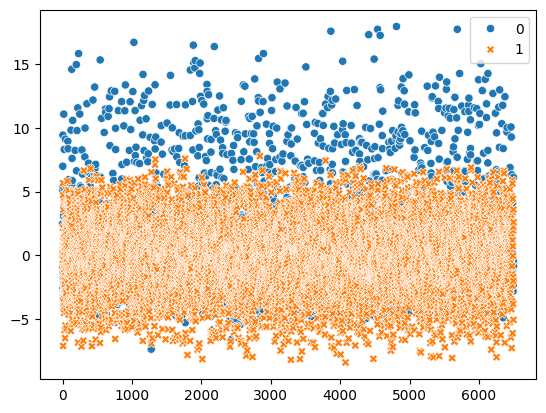

In [28]:
sns.scatterplot(X_prep)

In [31]:
from sklearn.preprocessing import OrdinalEncoder

In [33]:
y = OrdinalEncoder().fit_transform(pd.DataFrame(labels))

In [35]:
pd.DataFrame(labels)

label
0             SOUTHERN DOGFACE
1                       ADONIS
2               BROWN SIPROETA
3                      MONARCH
4     GREEN CELLED CATTLEHEART
...                        ...
6494          MANGROVE SKIPPER
6495            MOURNING CLOAK
6496                   APPOLLO
6497           ELBOWED PIERROT
6498                     ATALA

[6499 rows x 1 columns]

In [36]:
np.unique(y)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74.])

In [38]:
np.unique(labels).shape

(75,)

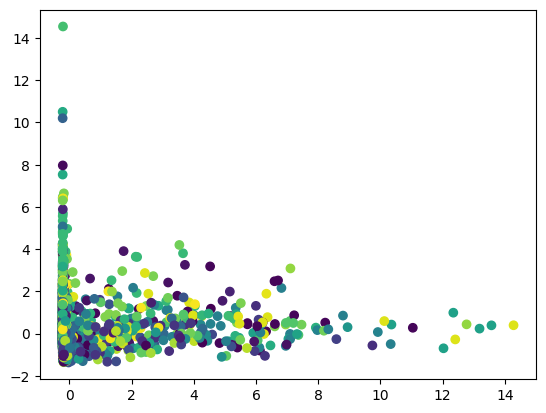

In [41]:
plt.scatter(X[:, 0], X[:, 1], c=np.array(y))